In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

In [3]:
warnings.filterwarnings(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_ii data

In [4]:
df = pd.read_csv("../../../data/raw/partner_ii/db3_cement.csv")

<IPython.core.display.Javascript object>

In [5]:
df = df[df["strength_28d"].notna()].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [6]:
df.shape

(1057, 29)

<IPython.core.display.Javascript object>

In [7]:
df.head()

sample_date  sample_id_plant unified_material_name  \
0  2020-01-01 11:00:00+00:00          1058403              Type III   
1  2020-01-01 11:00:00+00:00          1058402             Type I-II   
2  2020-01-02 11:00:00+00:00          1058589              Type III   
3  2020-01-02 11:00:00+00:00          1058587             Type I-II   
4  2020-01-03 11:00:00+00:00          1058734             Type I-II   

      raw_material_code    cao   sio2  al2o3  fe2o3   mgo   so3  ...   loi  \
0  Daily Average Cement  62.33  19.42   4.86   3.22  3.74  3.08  ...  2.62   
1  Daily Average Cement  63.45  19.63   4.90   3.30  3.50  2.89  ...  3.08   
2  Daily Average Cement  62.22  19.30   4.80   3.23  3.60  3.20  ...  3.08   
3  Daily Average Cement  62.34  19.28   4.81   3.29  3.48  2.85  ...  3.38   
4  Daily Average Cement  62.18  19.29   4.85   3.33  3.47  2.87  ...  3.20   

   water_demand  setting_initial  strength_1d  strength_3d  strength_7d  \
0          29.0            120.0        24.38        35.93        41.30   
1          24.5            160.0        16.41        28.32        34.34   
2          29.0            115.0        24.38        36.11        37.84   
3          24.5            160.0        14.46        26.75        32.40   
4          26.0            155.0        16.32        27.53        31.72   

   strength_28d  blaine  sieve_32um  sieve_45um  
0         50.87   570.0        1.08       99.46  
1         42.93   386.0        7.68       95.25  
2         49.72   573.0        0.87       99.47  
3         39.49   384.0        8.35       95.44  
4         40.55   373.0        6.76       96.62  

[5 rows x 29 columns]

<IPython.core.display.Javascript object>

In [8]:
df.tail()

sample_date  sample_id_plant unified_material_name  \
1052  2021-12-28 11:00:00+00:00          1181128              Type III   
1053  2021-12-29 11:00:00+00:00          1181312               Type IL   
1054  2021-12-30 11:00:00+00:00          1181395               Type IL   
1055  2021-12-31 11:00:00+00:00          1181620               Type IL   
1056  2021-12-31 11:00:00+00:00          1181618             Type I-II   

         raw_material_code    cao   sio2  al2o3  fe2o3   mgo   so3  ...   loi  \
1052  Daily Average Cement  63.32  19.52   4.39   3.25  2.26  3.39  ...  2.86   
1053  Daily Average Cement  62.24  18.11   4.19   3.03  2.26  3.13  ...  5.56   
1054  Daily Average Cement  62.23  18.10   4.21   3.03  2.26  3.08  ...  5.60   
1055  Daily Average Cement  62.27  18.02   4.15   2.99  2.33  3.12  ...  5.73   
1056  Daily Average Cement  62.95  19.38   4.44   3.22  2.35  2.91  ...  3.21   

      water_demand  setting_initial  strength_1d  strength_3d  strength_7d  \
1052          29.5            145.0        26.21        34.54        35.42   
1053          26.5            165.0        14.90        20.88        33.56   
1054          26.5            170.0        13.60        29.02        32.89   
1055          27.0            165.0        14.92        25.06        28.36   
1056          25.0            170.0        13.48        25.22        28.58   

      strength_28d  blaine  sieve_32um  sieve_45um  
1052         46.44   601.0        0.96       99.12  
1053         39.87   460.0        3.24       98.43  
1054         36.74   434.0        3.31       98.17  
1055         36.36   434.0        3.16       99.15  
1056         36.77   384.0        5.60       98.39  

[5 rows x 29 columns]

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_date            1057 non-null   object 
 1   sample_id_plant        1057 non-null   int64  
 2   unified_material_name  1057 non-null   object 
 3   raw_material_code      1057 non-null   object 
 4   cao                    1045 non-null   float64
 5   sio2                   1045 non-null   float64
 6   al2o3                  1045 non-null   float64
 7   fe2o3                  1045 non-null   float64
 8   mgo                    1045 non-null   float64
 9   so3                    1045 non-null   float64
 10  k2o                    1045 non-null   float64
 11  na2o                   1045 non-null   float64
 12  cl                     1 non-null      float64
 13  tio2                   1 non-null      float64
 14  alite                  1026 non-null   float64
 15  beli

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [10]:
df.dtypes.value_counts()

float64    25
object      3
int64       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [11]:
df.describe().transpose()

count          mean           std         min          25%  \
sample_id_plant  1057.0  1.116884e+06  35569.163958  1058402.00  1086000.000   
cao              1045.0  6.216070e+01      0.503725       58.75       61.890   
sio2             1045.0  1.914230e+01      0.448662       16.79       19.030   
al2o3            1045.0  4.676459e+00      0.162138        3.97        4.570   
fe2o3            1045.0  3.223694e+00      0.099771        2.92        3.170   
mgo              1045.0  3.005923e+00      0.344269        1.76        2.840   
so3              1045.0  3.019579e+00      0.167625        2.57        2.890   
k2o              1045.0  6.390526e-01      0.052072        0.50        0.600   
na2o             1045.0  7.858373e-02      0.033967        0.00        0.050   
cl                  1.0  0.000000e+00           NaN        0.00        0.000   
tio2                1.0  7.000000e-02           NaN        0.07        0.070   
alite            1026.0  5.701130e+01      2.886962       32.64       55.370   
belite           1026.0  1.502018e+01      2.089796       10.02       13.710   
aluminate        1026.0  5.346862e+00      0.549563        1.34        4.990   
ferrite          1026.0  1.102264e+01      0.538800        9.26       10.680   
free_lime        1030.0  1.004553e+00      0.195929        0.49        0.860   
loi              1057.0  3.288401e+00      0.753072        1.24        3.000   
water_demand     1057.0  2.643803e+01      2.219424        0.00       25.500   
setting_initial  1057.0  1.489962e+02     17.276714       95.00      140.000   
strength_1d      1055.0  1.773495e+01      3.839591       12.10       15.265   
strength_3d      1056.0  2.935009e+01      3.818775       20.88       26.735   
strength_7d      1055.0  3.528145e+01      3.540005       27.45       32.860   
strength_28d     1057.0  4.300172e+01      3.537138       34.15       40.660   
blaine           1057.0  4.269281e+02     81.506754      280.00      374.000   
sieve_32um       1057.0  5.767909e+00     13.965193        0.44        3.160   
sieve_45um       1057.0  9.731774e+01      3.003362        9.76       96.460   

                         50%           75%         max  
sample_id_plant  1116845.000  1.145928e+06  1181620.00  
cao                   62.150  6.245000e+01       64.75  
sio2                  19.230  1.938000e+01       20.15  
al2o3                  4.690  4.800000e+00        5.04  
fe2o3                  3.220  3.280000e+00        4.58  
mgo                    3.010  3.190000e+00        3.99  
so3                    2.940  3.110000e+00        3.58  
k2o                    0.630  6.800000e-01        0.82  
na2o                   0.070  1.100000e-01        0.17  
cl                     0.000  0.000000e+00        0.00  
tio2                   0.070  7.000000e-02        0.07  
alite                 57.545  5.887750e+01       63.62  
belite                14.870  1.627750e+01       31.18  
aluminate              5.330  5.640000e+00        7.35  
ferrite               11.000  1.134000e+01       16.15  
free_lime              0.990  1.140000e+00        2.11  
loi                    3.160  3.280000e+00        7.04  
water_demand          25.500  2.700000e+01       64.00  
setting_initial      150.000  1.600000e+02      185.00  
strength_1d           16.140  1.780000e+01       28.30  
strength_3d           28.205  3.051250e+01       40.72  
strength_7d           34.580  3.697000e+01       45.48  
strength_28d          42.500  4.505000e+01       54.56  
blaine               382.000  4.550000e+02      607.00  
sieve_32um             6.020  7.400000e+00      451.00  
sieve_45um            97.200  9.859000e+01       99.96

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [12]:
df.describe(exclude="number").T

count unique                        top  freq
sample_date            1057    694  2020-05-11 10:00:00+00:00     3
unified_material_name  1057      3                  Type I-II   735
raw_material_code      1057      1       Daily Average Cement  1057

<IPython.core.display.Javascript object>

In [13]:
df["unified_material_name"].value_counts()

unified_material_name
Type I-II    735
Type III     244
Type IL       78
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
dates = df["sample_date"].copy()

<IPython.core.display.Javascript object>

In [15]:
print(dates.min())
print(dates.max())

2020-01-01 11:00:00+00:00
2021-12-31 11:00:00+00:00


<IPython.core.display.Javascript object>

In [16]:
dates

0       2020-01-01 11:00:00+00:00
1       2020-01-01 11:00:00+00:00
2       2020-01-02 11:00:00+00:00
3       2020-01-02 11:00:00+00:00
4       2020-01-03 11:00:00+00:00
                  ...            
1052    2021-12-28 11:00:00+00:00
1053    2021-12-29 11:00:00+00:00
1054    2021-12-30 11:00:00+00:00
1055    2021-12-31 11:00:00+00:00
1056    2021-12-31 11:00:00+00:00
Name: sample_date, Length: 1057, dtype: object

<IPython.core.display.Javascript object>

In [17]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


sample_date ['2020-01-01 11:00:00+00:00' '2020-01-02 11:00:00+00:00'
 '2020-01-03 11:00:00+00:00' '2020-01-04 11:00:00+00:00'
 '2020-01-05 11:00:00+00:00' '2020-01-07 11:00:00+00:00'
 '2020-01-08 11:00:00+00:00' '2020-01-09 11:00:00+00:00'
 '2020-01-10 11:00:00+00:00' '2020-01-11 11:00:00+00:00'
 '2020-01-12 11:00:00+00:00' '2020-01-13 11:00:00+00:00'
 '2020-01-14 11:00:00+00:00' '2020-01-15 11:00:00+00:00'
 '2020-01-16 11:00:00+00:00' '2020-01-17 11:00:00+00:00'
 '2020-01-19 11:00:00+00:00' '2020-01-20 11:00:00+00:00'
 '2020-01-21 11:00:00+00:00' '2020-01-22 11:00:00+00:00'
 '2020-01-23 11:00:00+00:00' '2020-01-24 11:00:00+00:00'
 '2020-01-25 11:00:00+00:00' '2020-01-26 11:00:00+00:00'
 '2020-01-27 11:00:00+00:00' '2020-01-28 11:00:00+00:00'
 '2020-01-29 11:00:00+00:00' '2020-01-30 11:00:00+00:00'
 '2020-01-31 11:00:00+00:00' '2020-02-01 11:00:00+00:00'
 '2020-02-02 11:00:00+00:00' '2020-02-03 11:00:00+00:00'
 '2020-02-04 11:00:00+00:00' '2020-02-05 11:00:00+00:00'
 '2020-02-06 11:00:

<IPython.core.display.Javascript object>

In [18]:
dates = pd.to_datetime(df["sample_date"])

<IPython.core.display.Javascript object>

In [19]:
dates.describe().T

count                                   1057
mean     2020-12-24 01:47:15.383159808+00:00
min                2020-01-01 11:00:00+00:00
25%                2020-06-26 10:00:00+00:00
50%                2020-12-15 11:00:00+00:00
75%                2021-06-17 10:00:00+00:00
max                2021-12-31 11:00:00+00:00
Name: sample_date, dtype: object

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

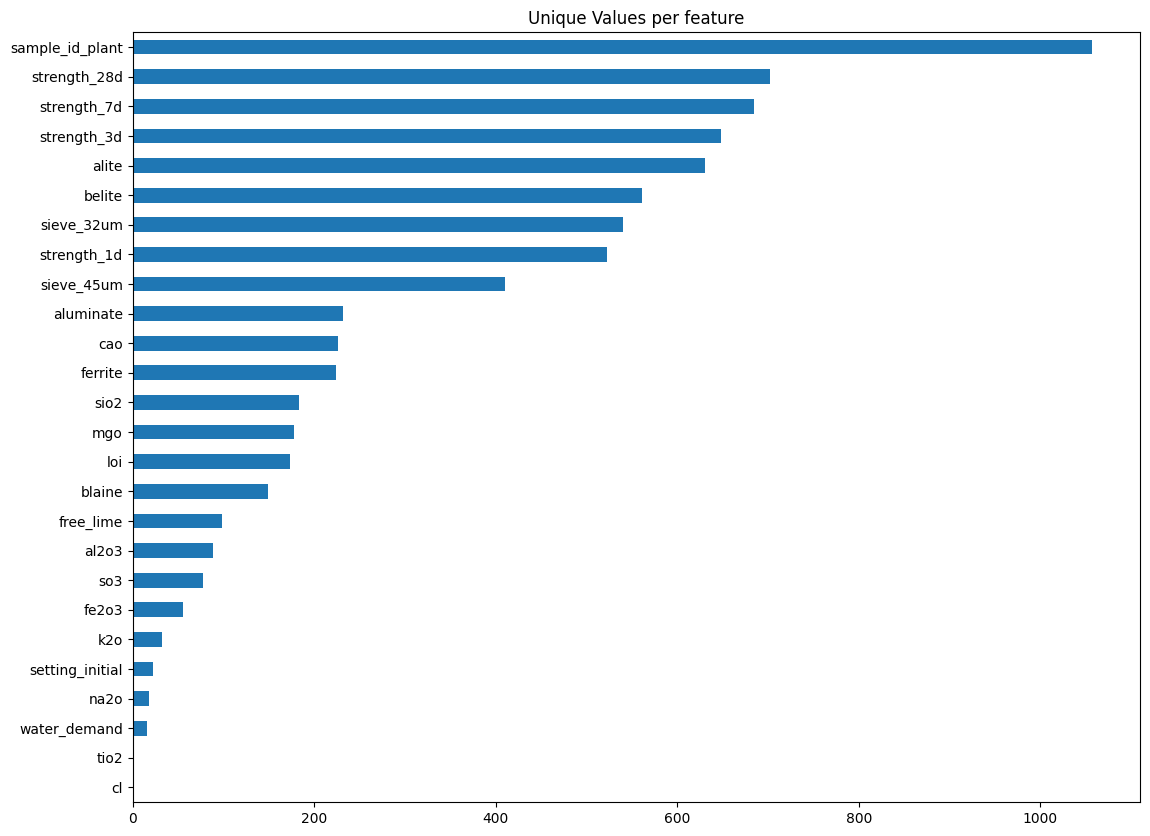

<IPython.core.display.Javascript object>

In [20]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'raw_material_code'),
  Text(1, 0, 'unified_material_name'),
  Text(2, 0, 'sample_date')])

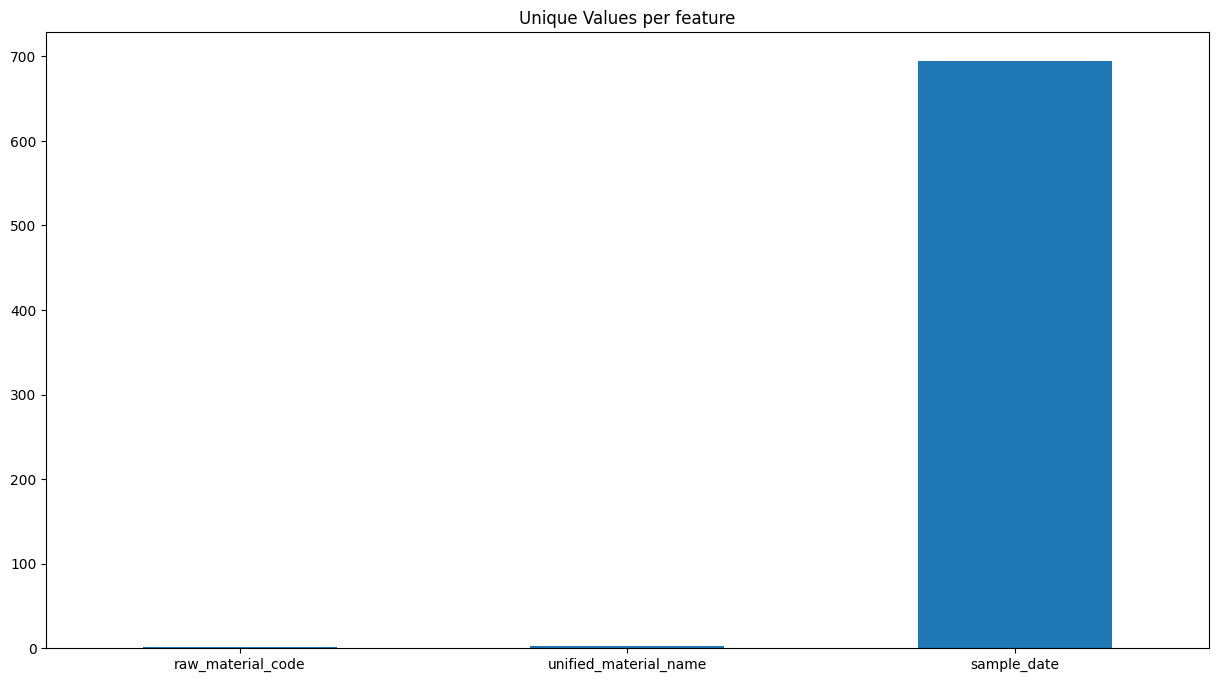

<IPython.core.display.Javascript object>

In [21]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [22]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 18 variables with missing values from a total of 29


<IPython.core.display.Javascript object>

In [23]:
df.isna().any().sort_values()

sample_date              False
blaine                   False
strength_28d             False
setting_initial          False
water_demand             False
loi                      False
sieve_32um               False
sieve_45um               False
sample_id_plant          False
unified_material_name    False
raw_material_code        False
mgo                       True
strength_7d               True
strength_3d               True
strength_1d               True
cao                       True
sio2                      True
fe2o3                     True
free_lime                 True
aluminate                 True
belite                    True
al2o3                     True
tio2                      True
cl                        True
na2o                      True
k2o                       True
so3                       True
ferrite                   True
alite                     True
dtype: bool

<IPython.core.display.Javascript object>

In [24]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [25]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  2364 missing values.


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count of quantity of missing values')

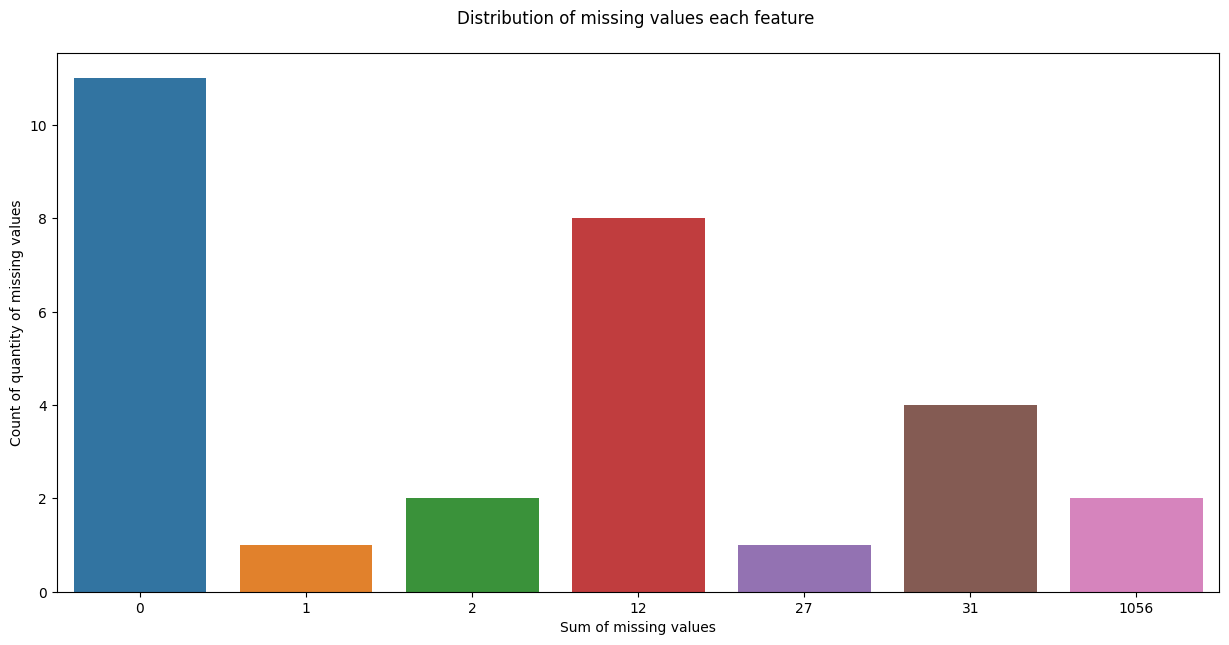

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 29 artists>

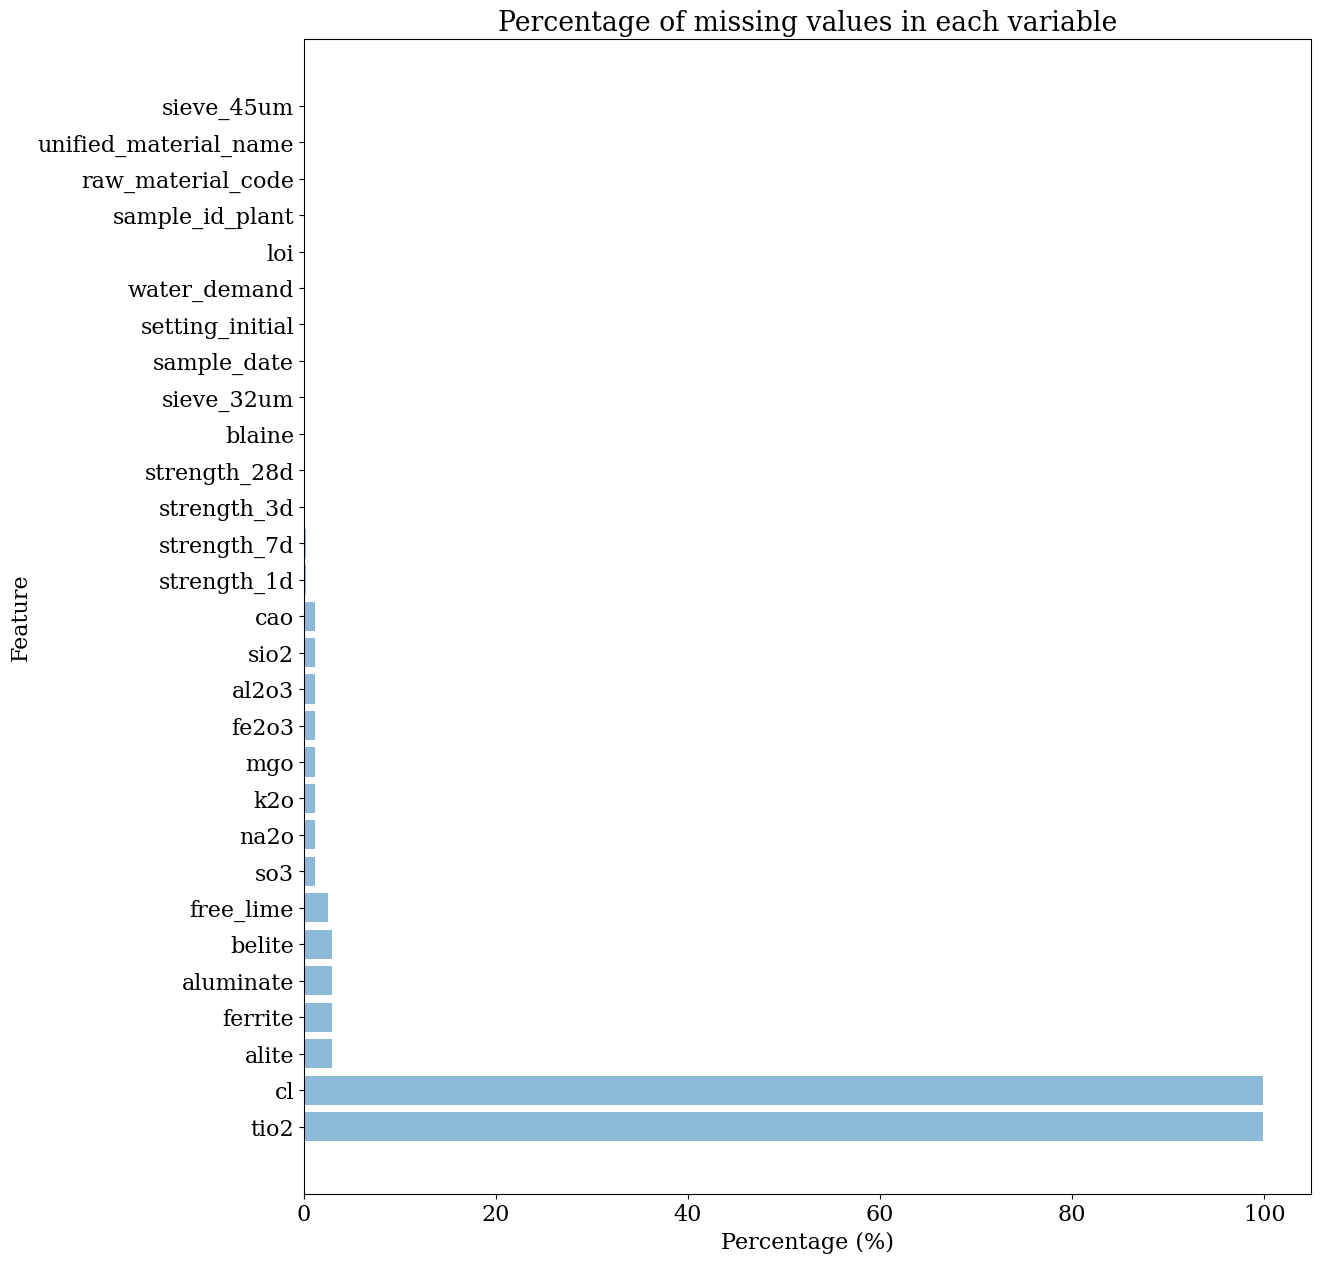

<IPython.core.display.Javascript object>

In [27]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [28]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [29]:
df["strength_28d"].notna().sum()

1057

<IPython.core.display.Javascript object>

<BarContainer object of 29 artists>

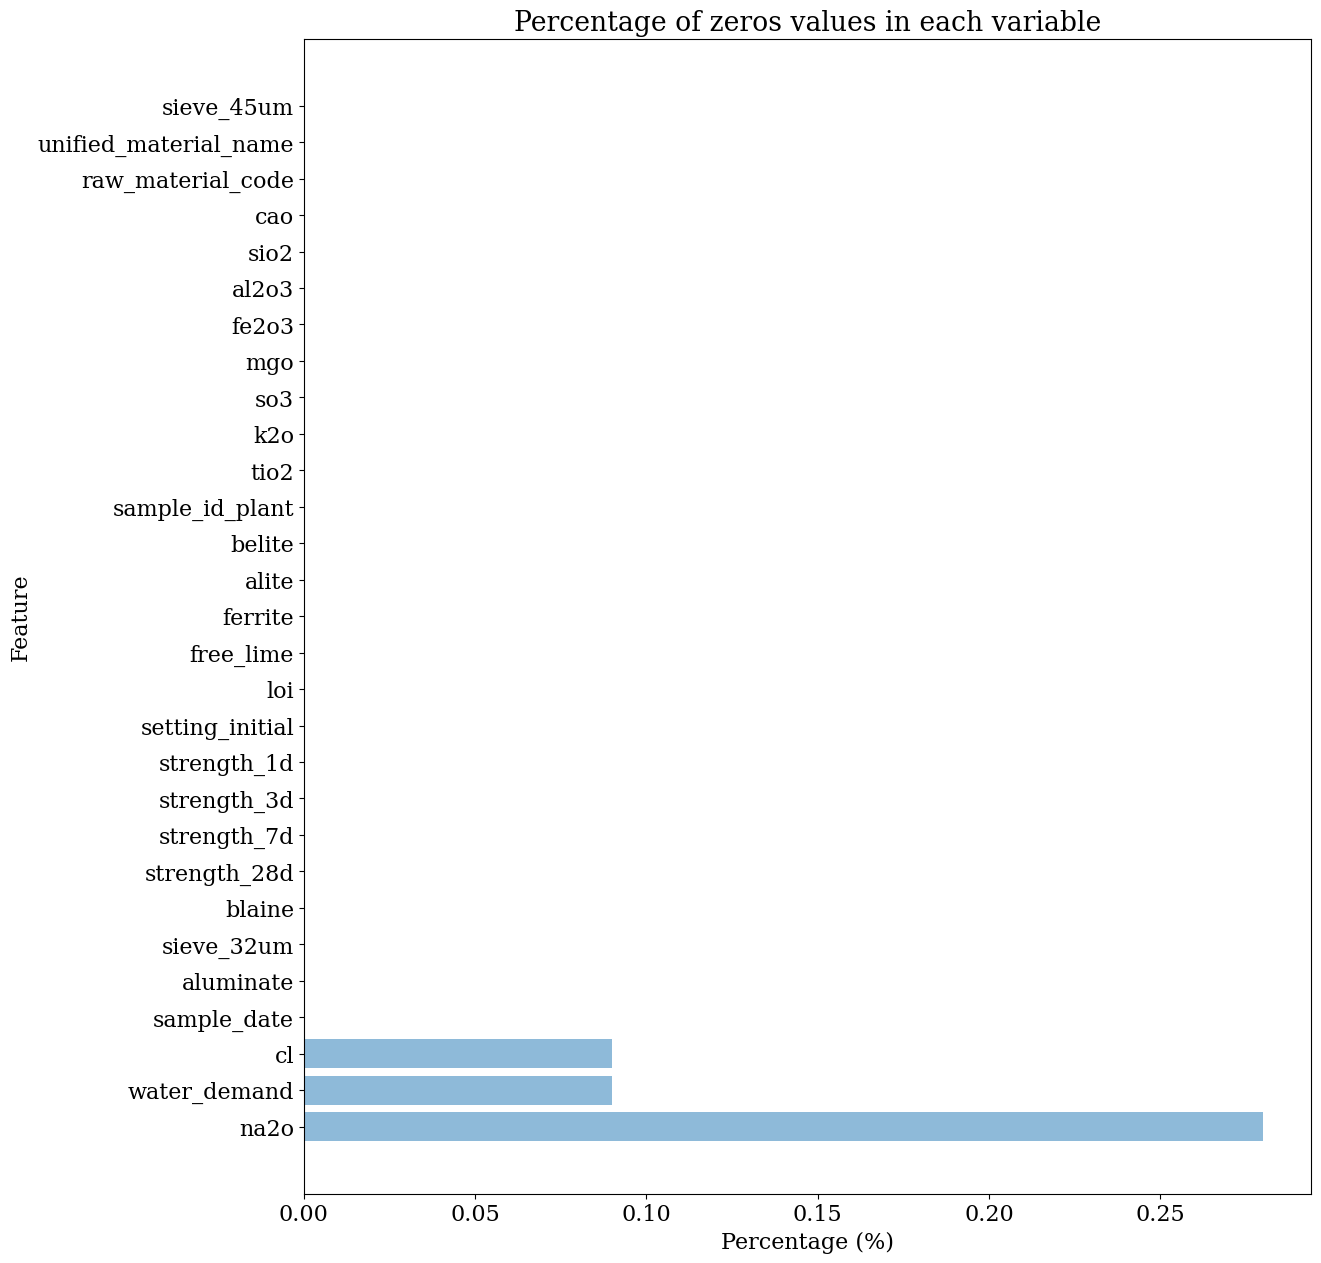

<IPython.core.display.Javascript object>

In [30]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [31]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [32]:
n_duplicates = df.drop(["sample_date"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

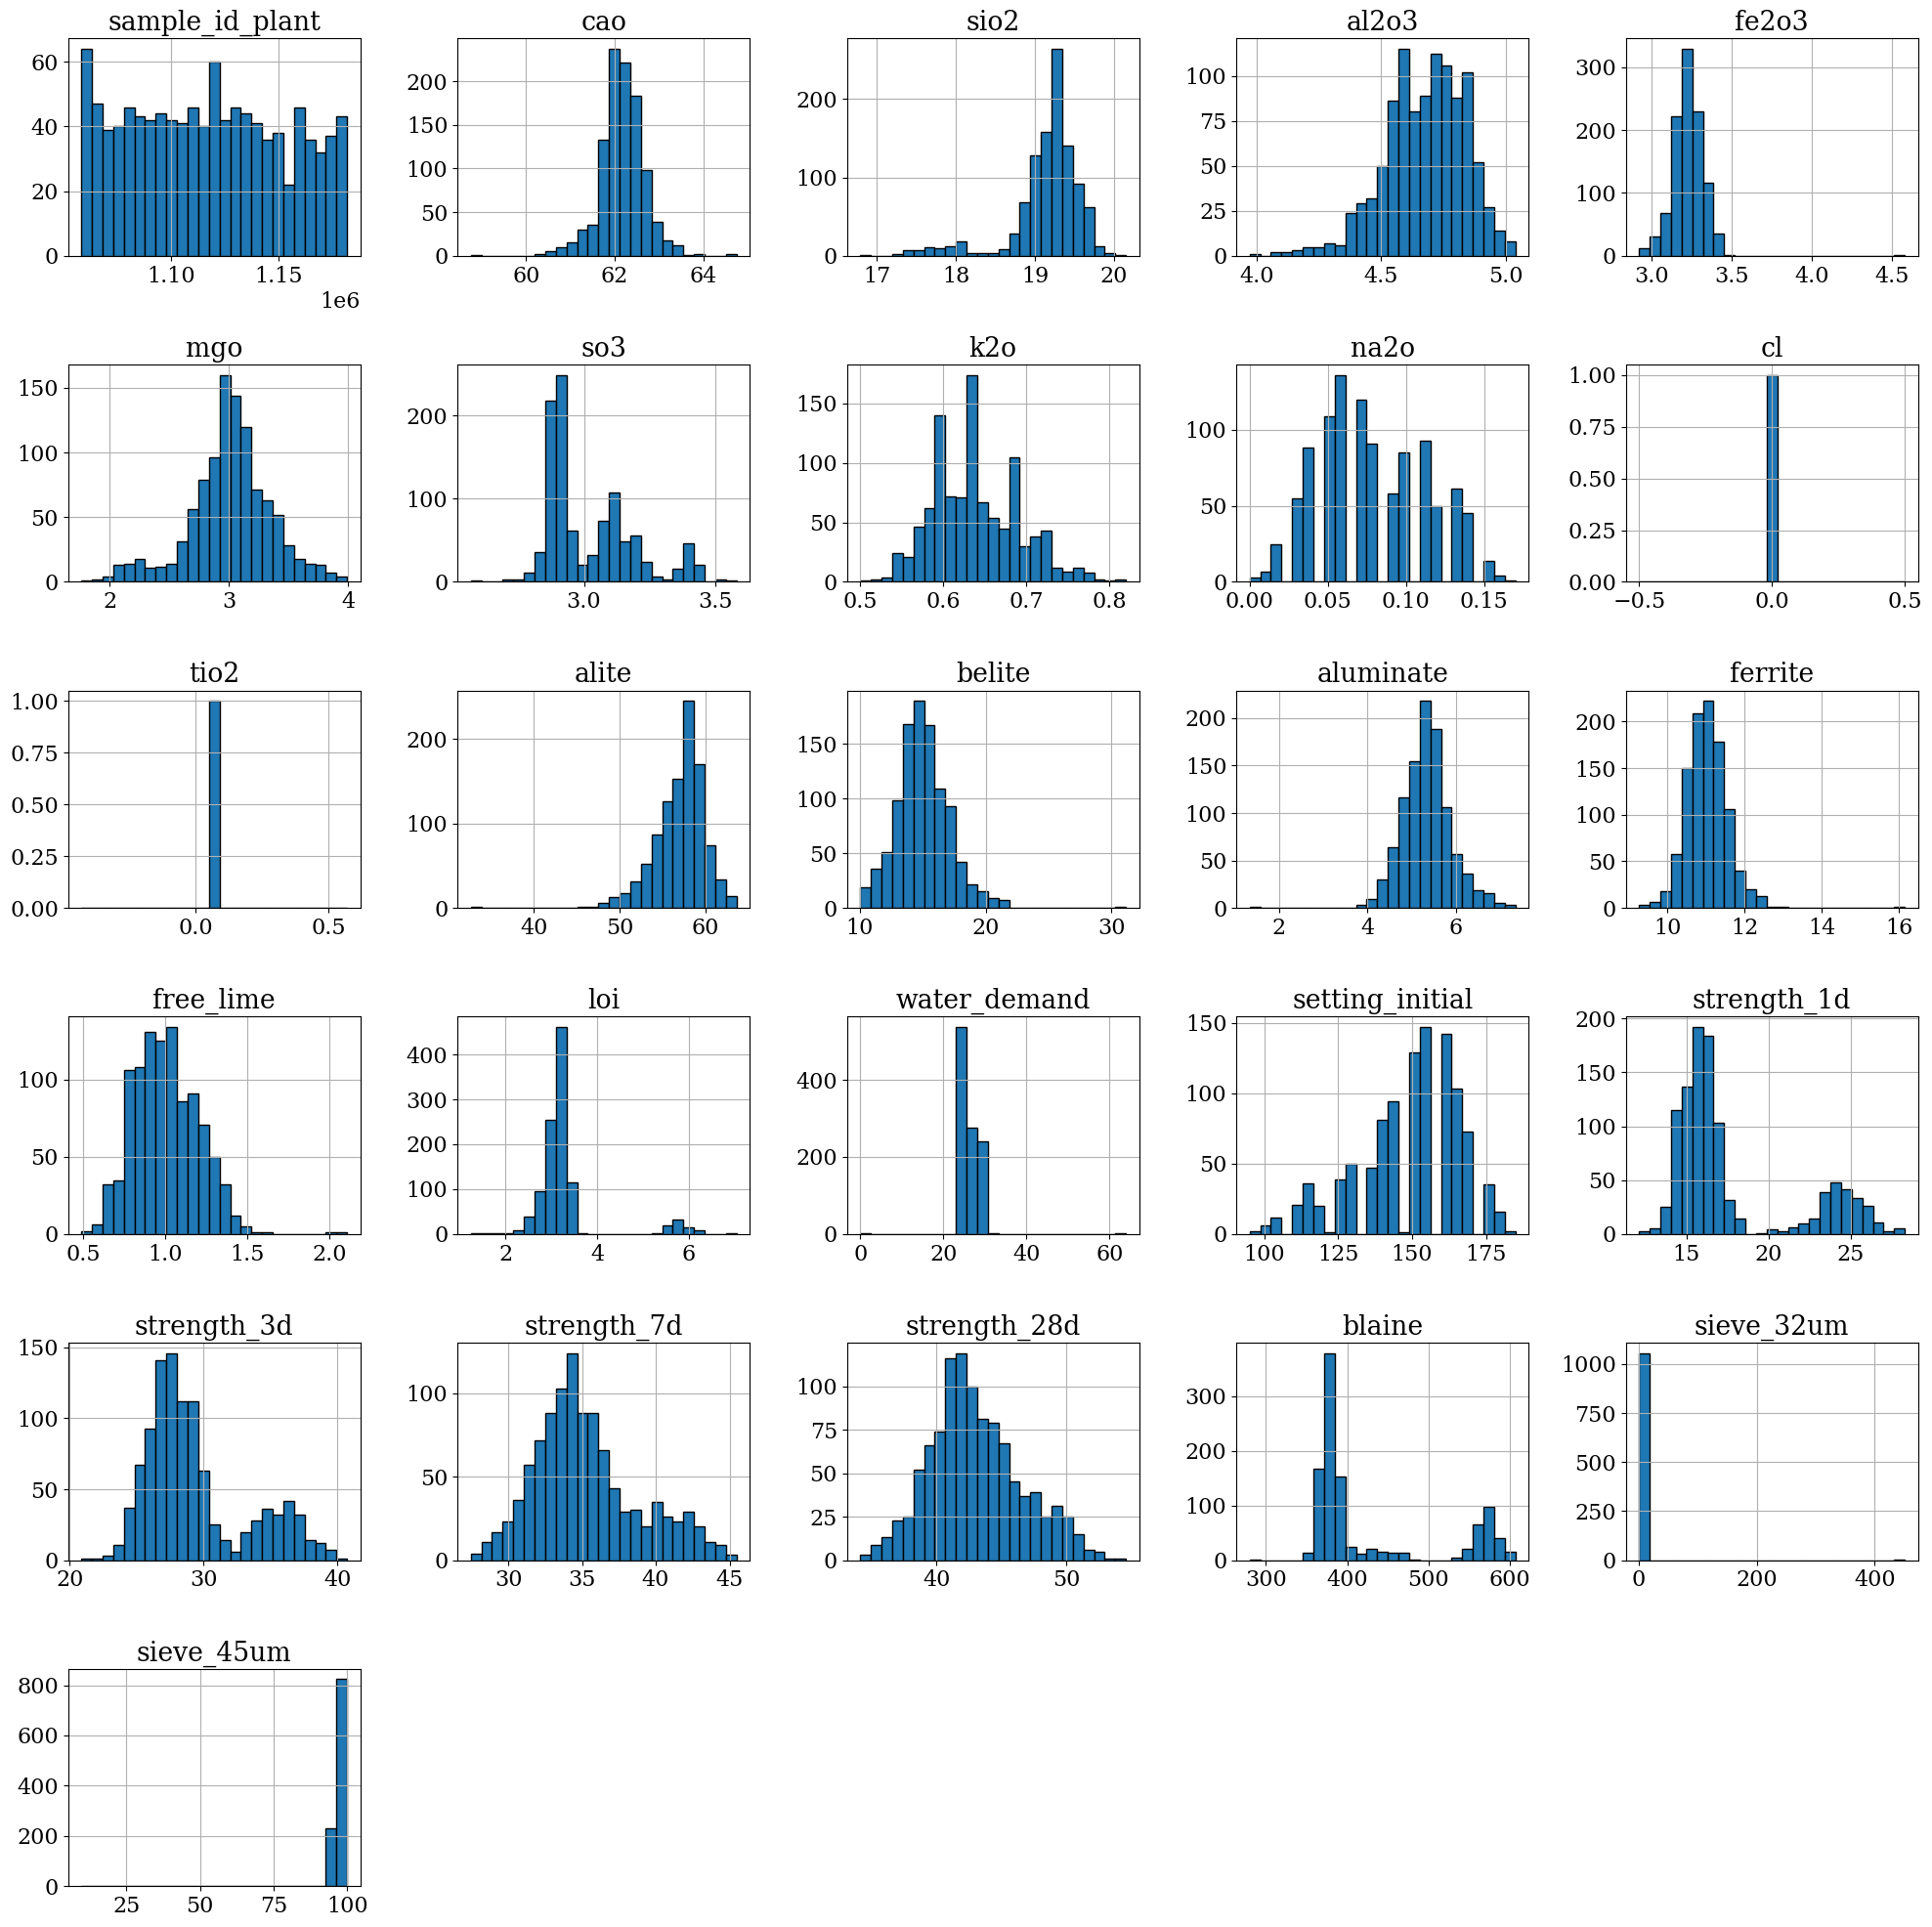

<IPython.core.display.Javascript object>

In [33]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

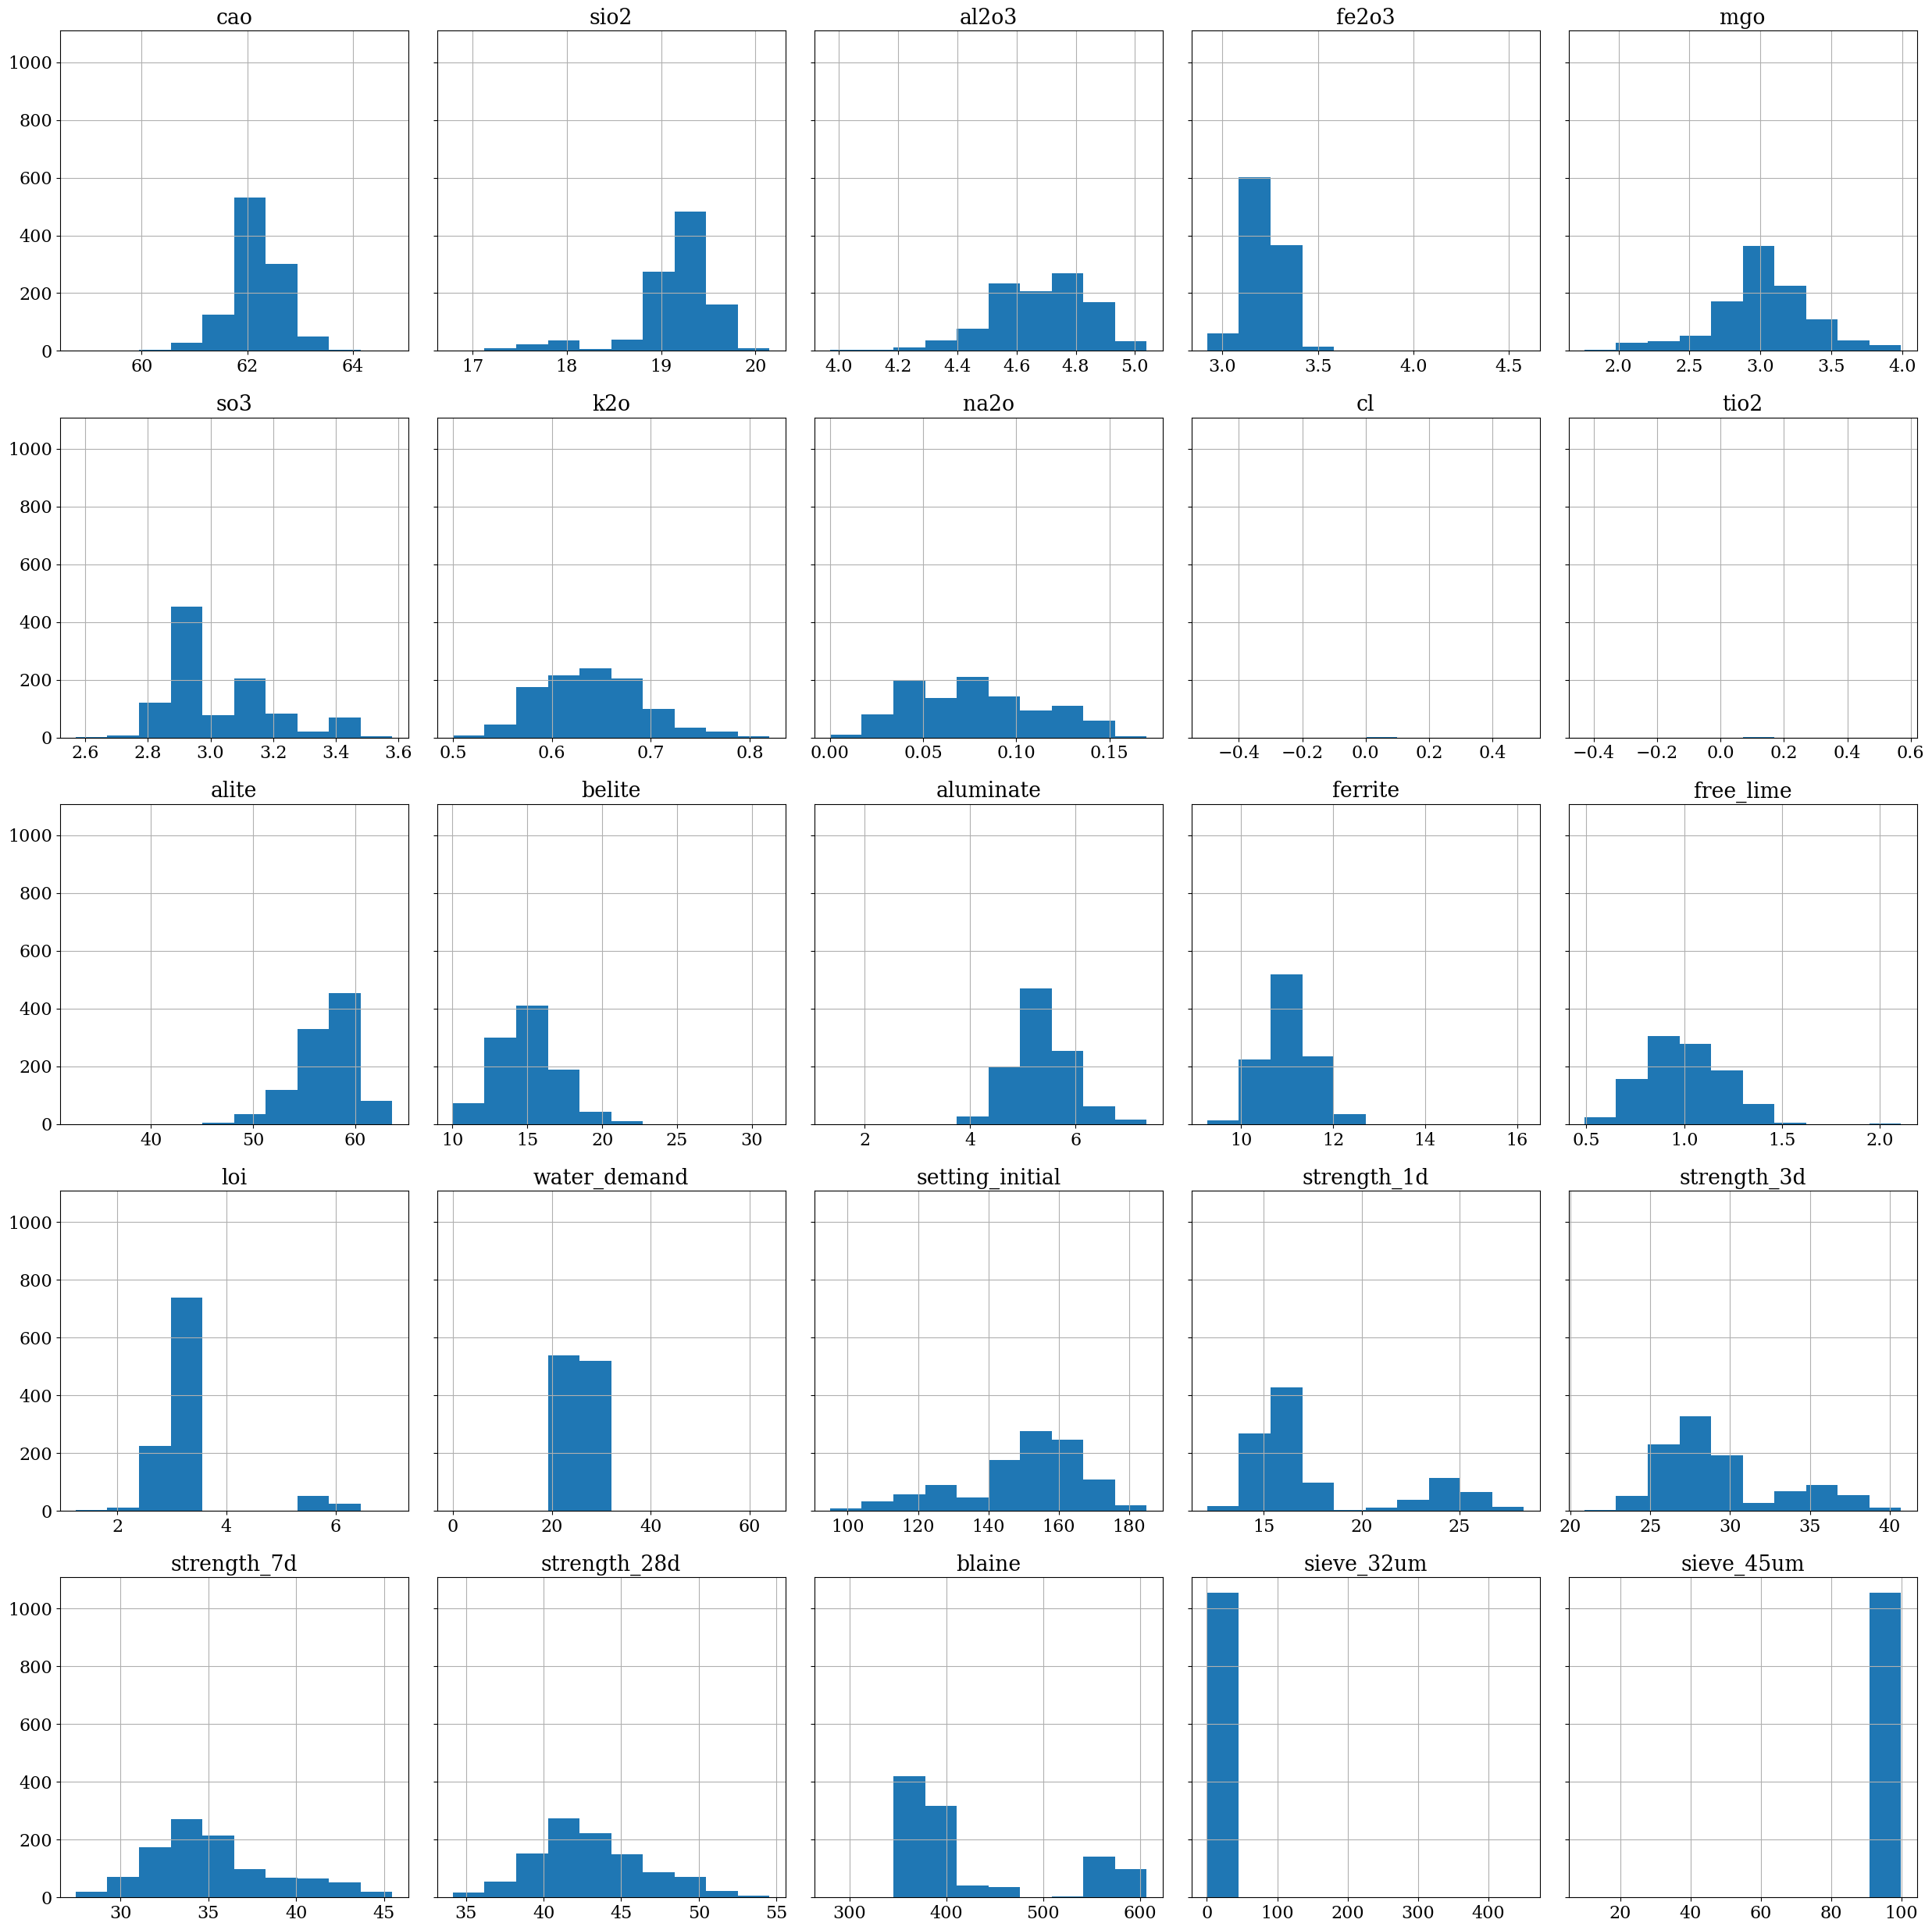

<IPython.core.display.Javascript object>

In [34]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_94108/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94108/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94108/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94108/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94108/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=T

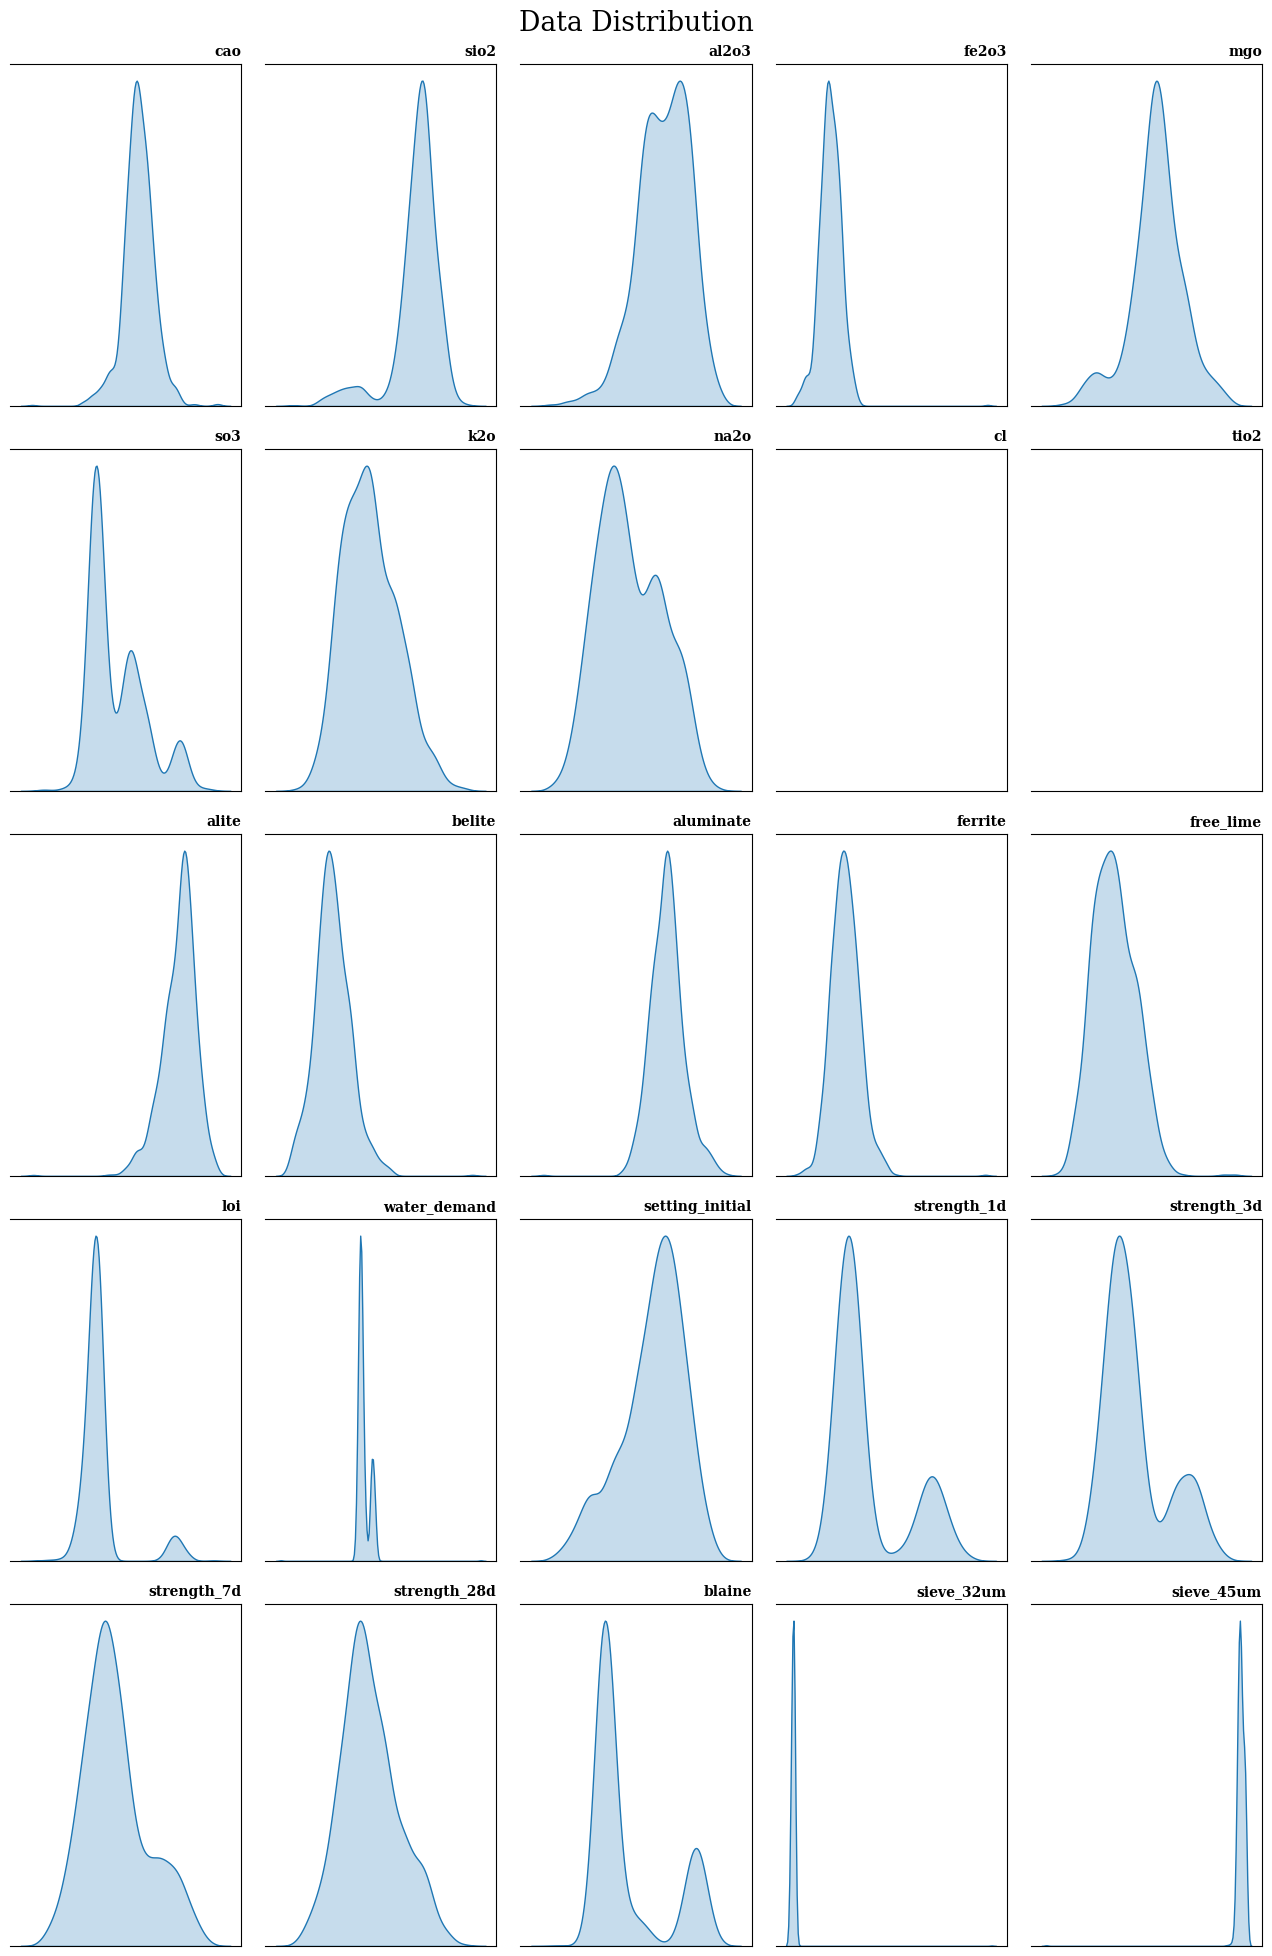

<IPython.core.display.Javascript object>

In [35]:
fig, axes = plt.subplots(5, 5, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

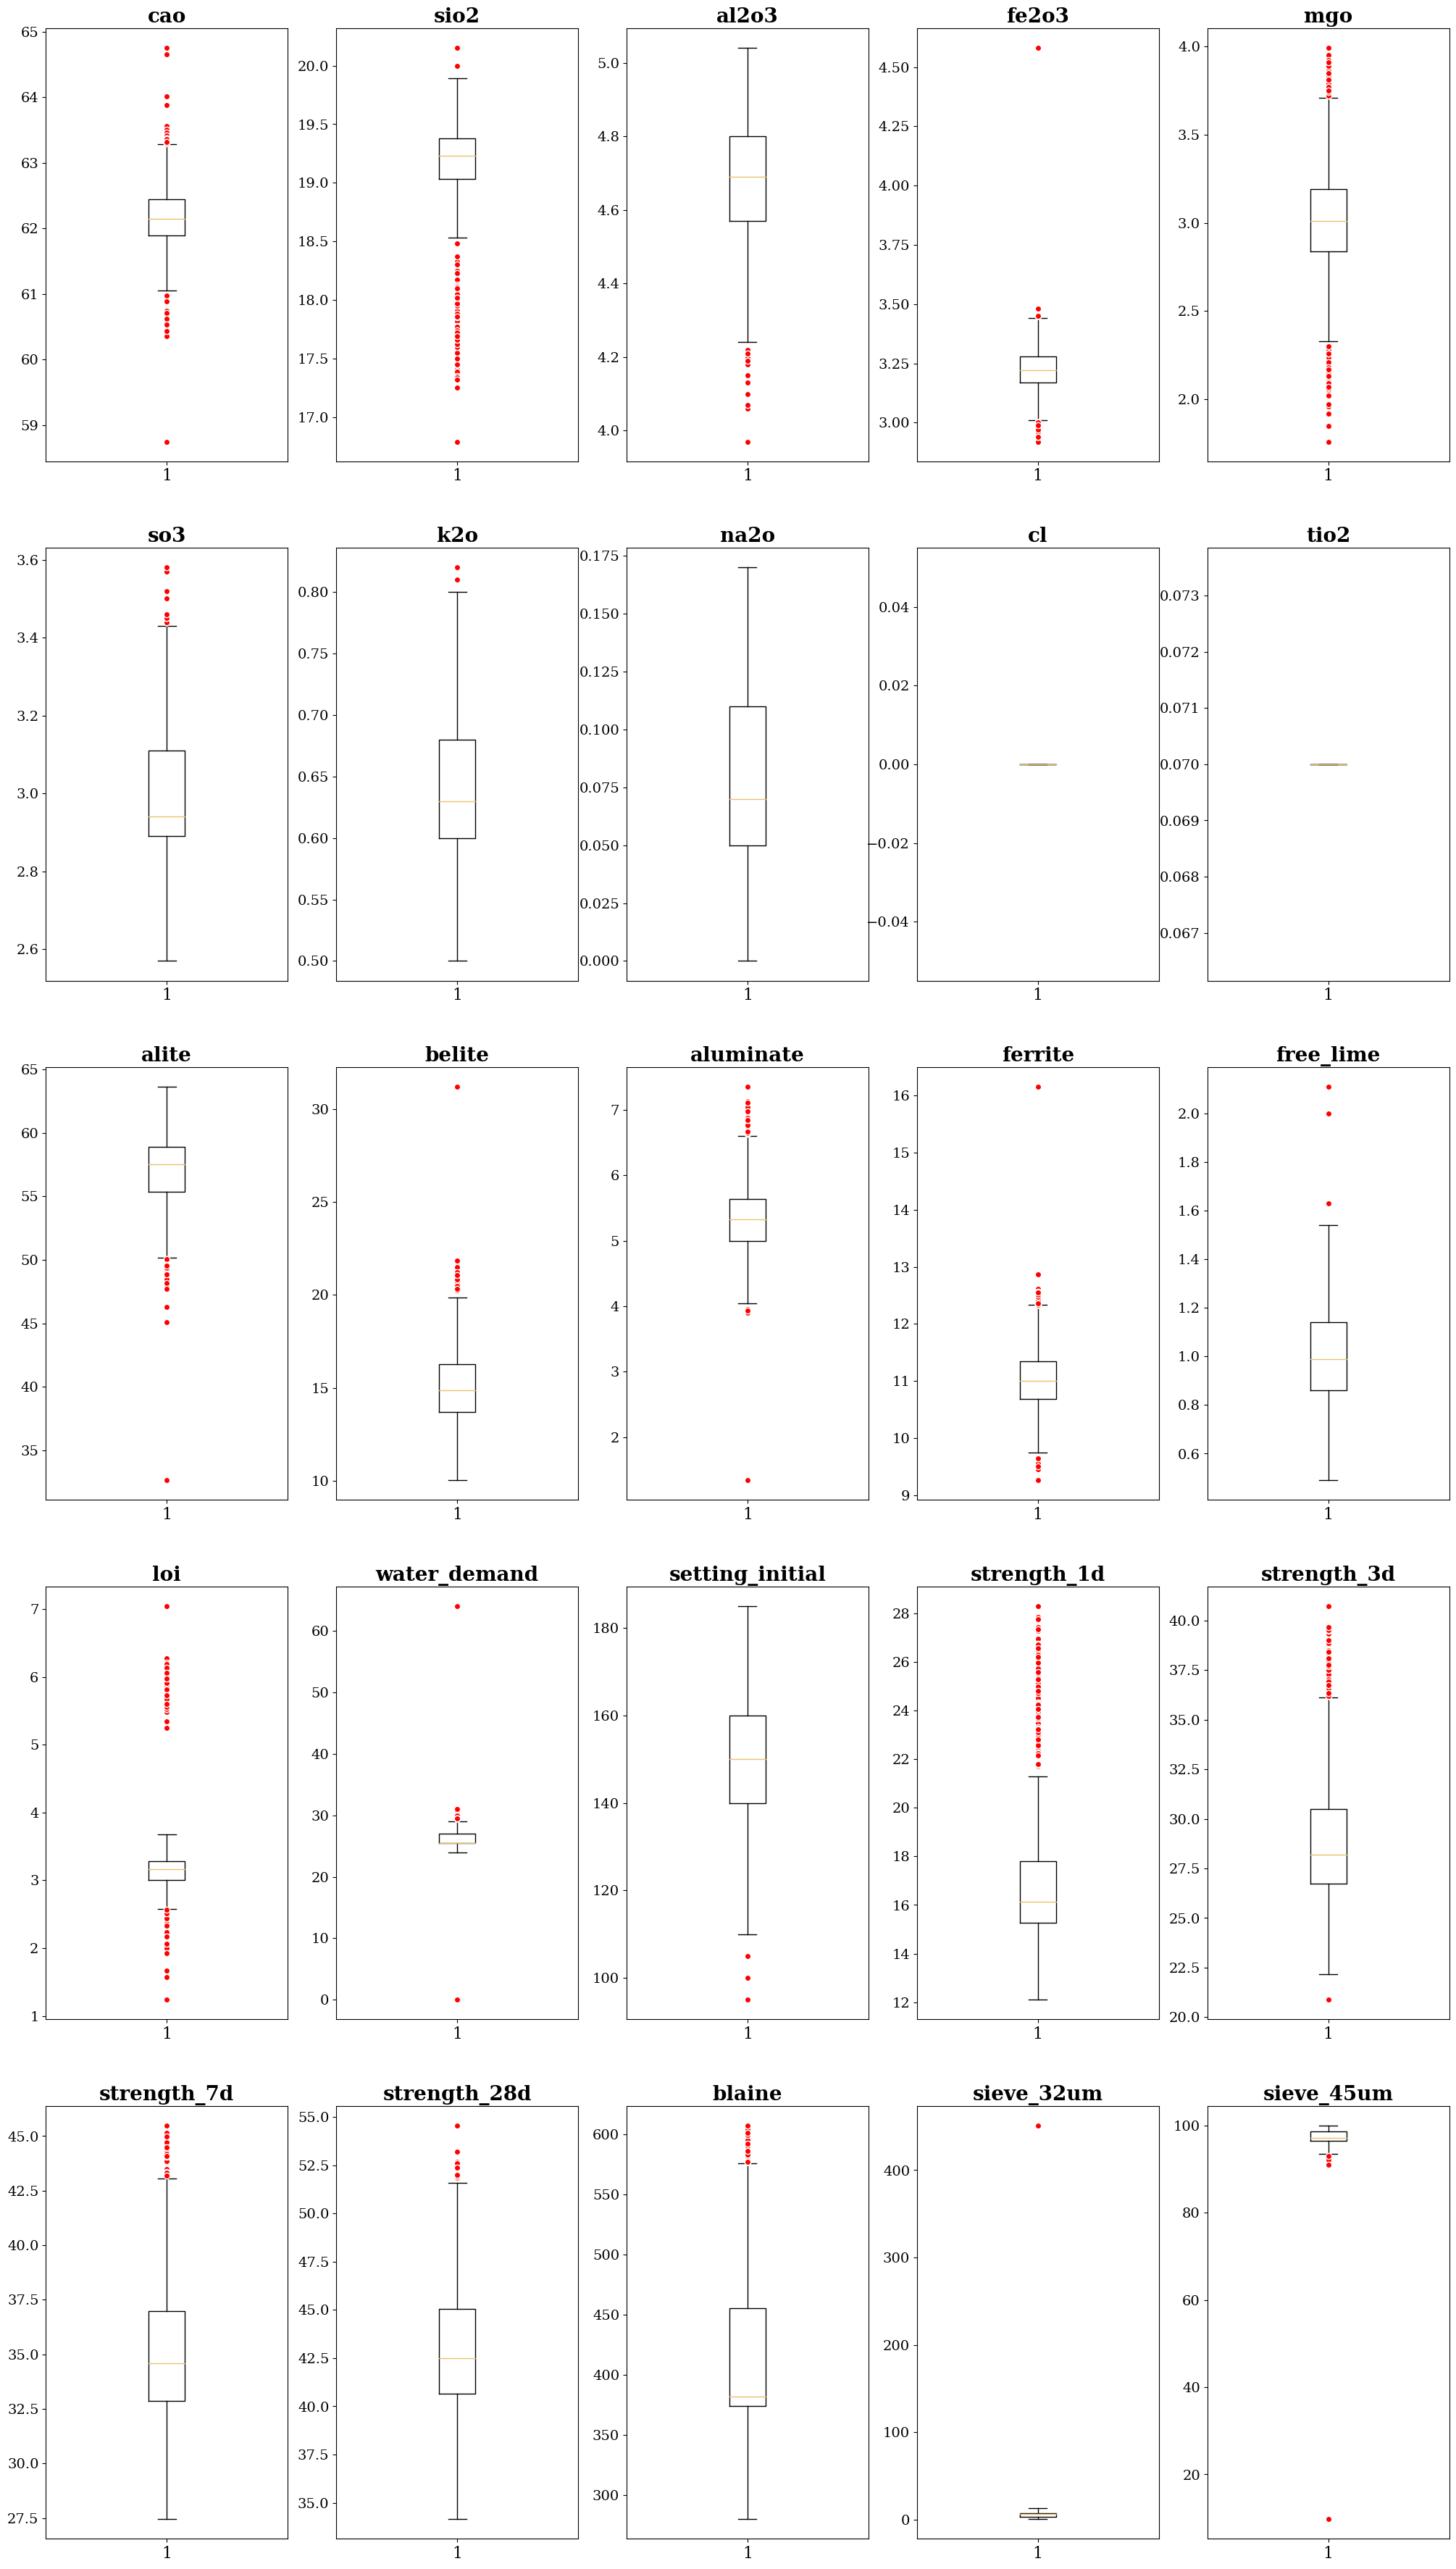

<IPython.core.display.Javascript object>

In [36]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(5, 5, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

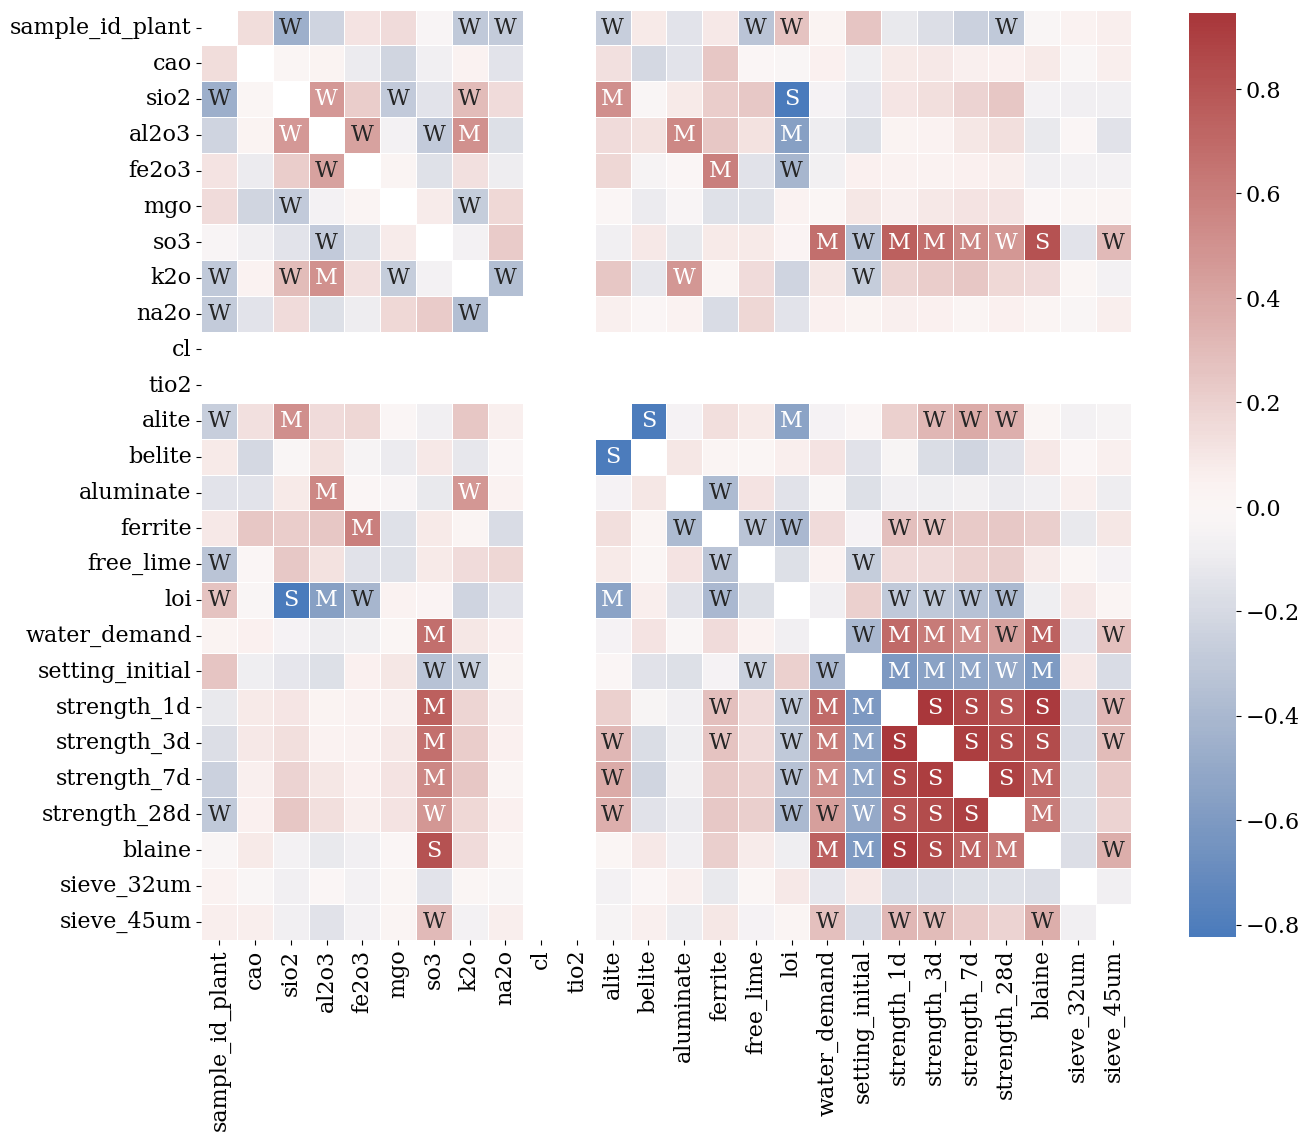

<IPython.core.display.Javascript object>

In [37]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

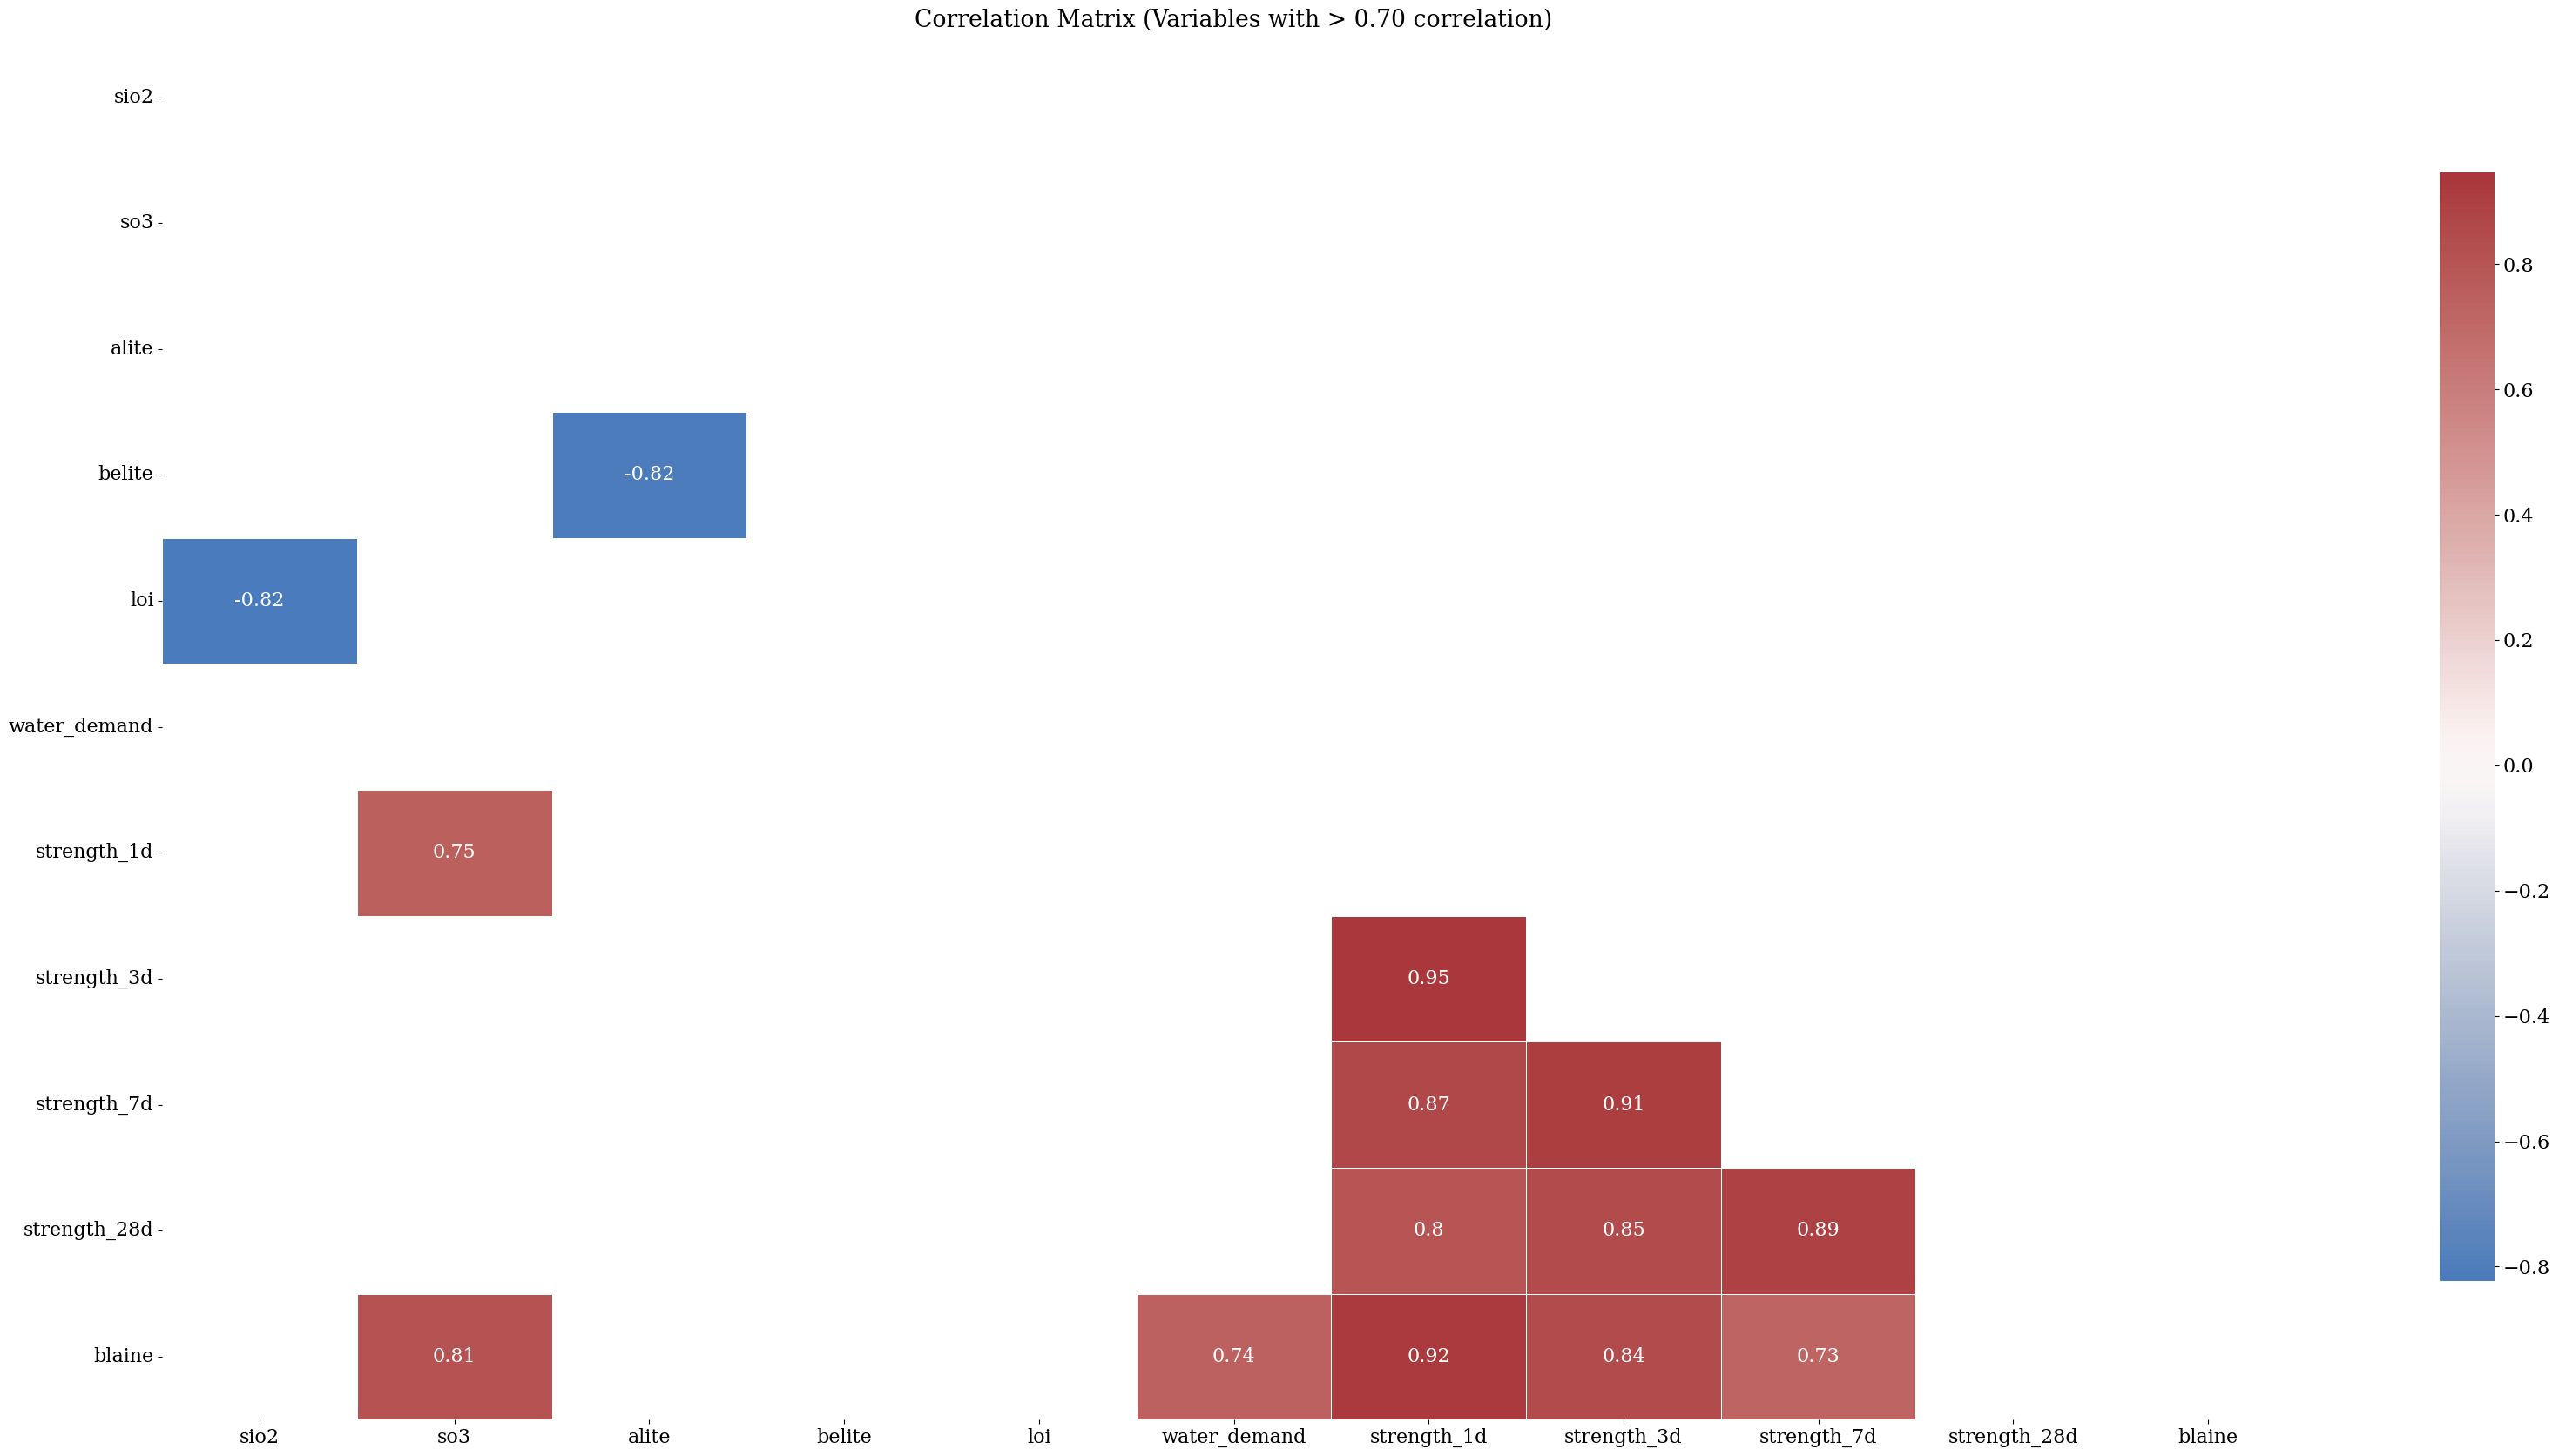

<IPython.core.display.Javascript object>

In [38]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [39]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

strength_1d   strength_3d     0.945678
              blaine          0.923892
strength_3d   strength_7d     0.910707
strength_7d   strength_28d    0.892431
strength_1d   strength_7d     0.868526
strength_3d   strength_28d    0.846149
              blaine          0.843750
sio2          loi             0.823054
alite         belite          0.816093
so3           blaine          0.809736
strength_1d   strength_28d    0.800373
so3           strength_1d     0.745872
water_demand  blaine          0.740994
strength_7d   blaine          0.725002
dtype: float64

<IPython.core.display.Javascript object>

In [40]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.892431
strength_3d      strength_28d    0.846149
strength_1d      strength_28d    0.800373
strength_28d     blaine          0.631277
setting_initial  strength_28d    0.496088
so3              strength_28d    0.475185
water_demand     strength_28d    0.439231
loi              strength_28d    0.388861
alite            strength_28d    0.356513
sample_id_plant  strength_28d    0.301459
sio2             strength_28d    0.244386
ferrite          strength_28d    0.236296
free_lime        strength_28d    0.211943
strength_28d     sieve_45um      0.191558
k2o              strength_28d    0.165114
strength_28d     sieve_32um      0.153495
belite           strength_28d    0.152181
al2o3            strength_28d    0.133745
mgo              strength_28d    0.115999
aluminate        strength_28d    0.098945
fe2o3            strength_28d    0.063526
na2o             strength_28d    0.048323
cao              strength_28d    0.047751
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

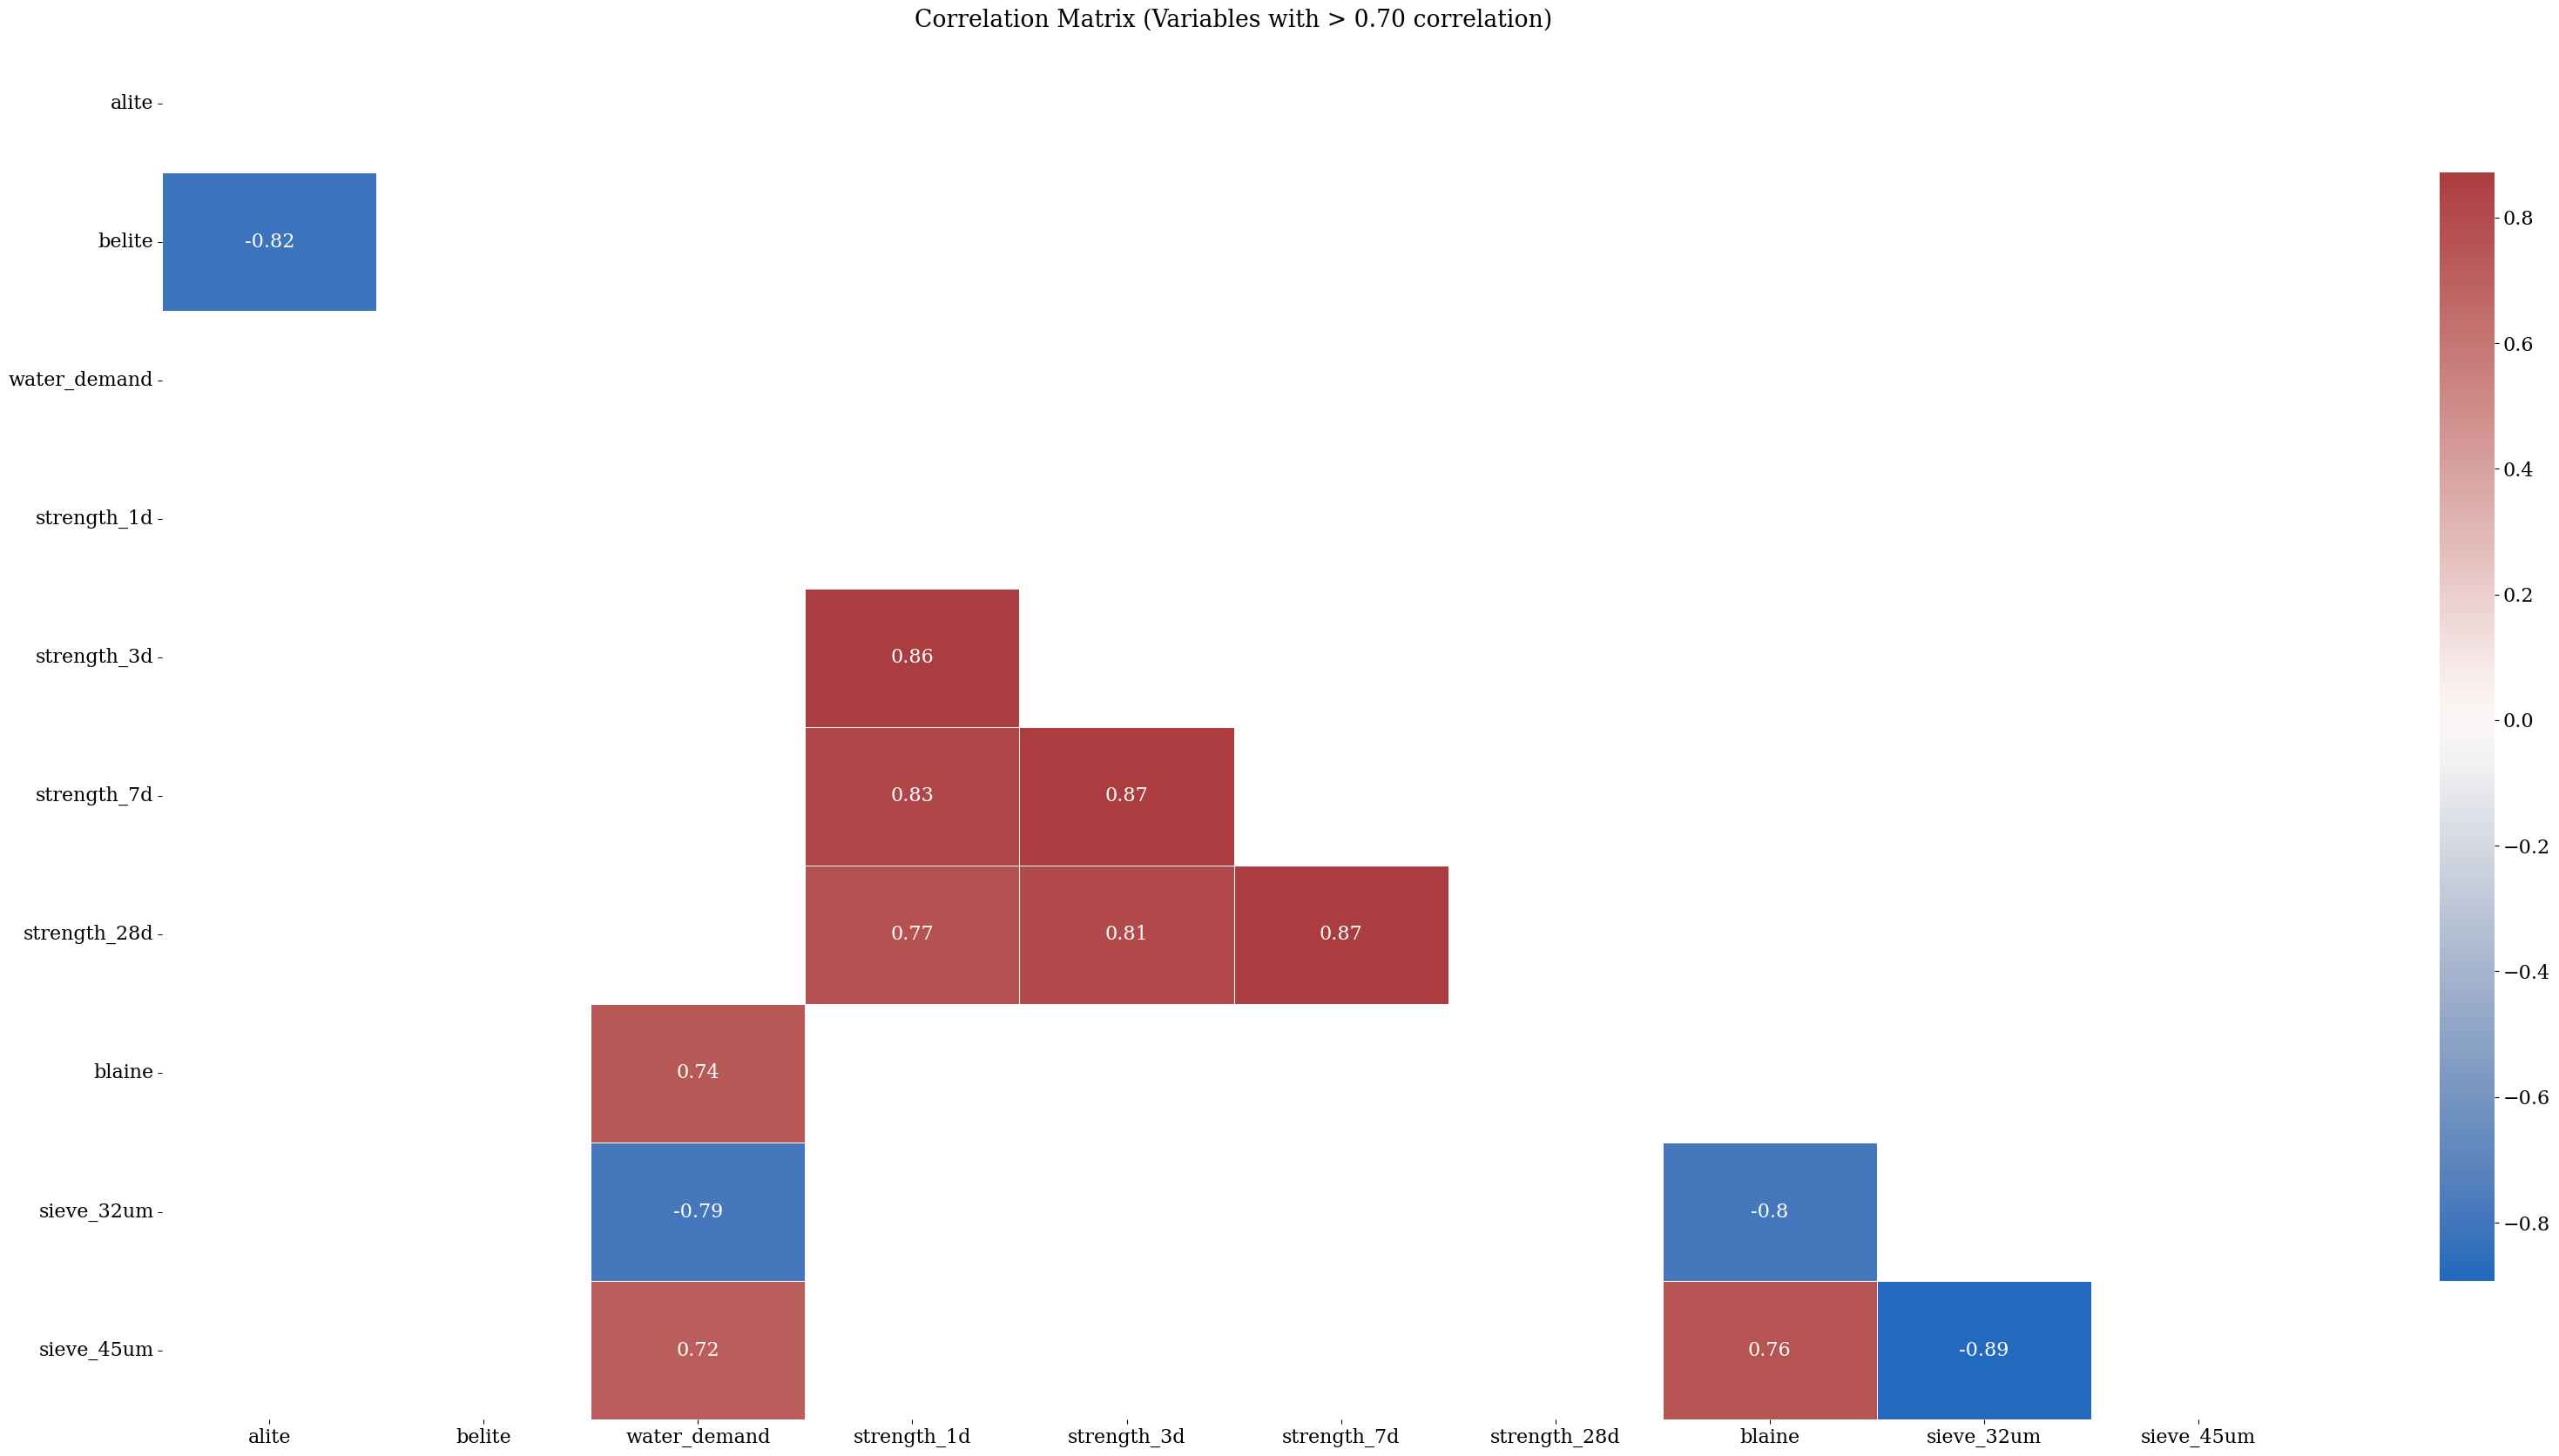

<IPython.core.display.Javascript object>

In [41]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [42]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sieve_32um    sieve_45um      0.892949
strength_3d   strength_7d     0.871229
strength_7d   strength_28d    0.869247
strength_1d   strength_3d     0.864977
              strength_7d     0.827749
alite         belite          0.819729
strength_3d   strength_28d    0.806179
blaine        sieve_32um      0.795559
water_demand  sieve_32um      0.792991
strength_1d   strength_28d    0.768187
blaine        sieve_45um      0.756813
water_demand  blaine          0.738705
              sieve_45um      0.716110
dtype: float64

<IPython.core.display.Javascript object>

In [43]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.869247
strength_3d      strength_28d    0.806179
strength_1d      strength_28d    0.768187
loi              strength_28d    0.456672
setting_initial  strength_28d    0.400698
so3              strength_28d    0.388351
strength_28d     sieve_32um      0.369006
alite            strength_28d    0.356944
water_demand     strength_28d    0.347511
strength_28d     blaine          0.335684
                 sieve_45um      0.331576
sample_id_plant  strength_28d    0.272985
ferrite          strength_28d    0.237693
free_lime        strength_28d    0.210409
belite           strength_28d    0.164985
sio2             strength_28d    0.149453
k2o              strength_28d    0.137864
mgo              strength_28d    0.128721
aluminate        strength_28d    0.119641
al2o3            strength_28d    0.086483
fe2o3            strength_28d    0.059013
na2o             strength_28d    0.022994
cao              strength_28d    0.011277
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

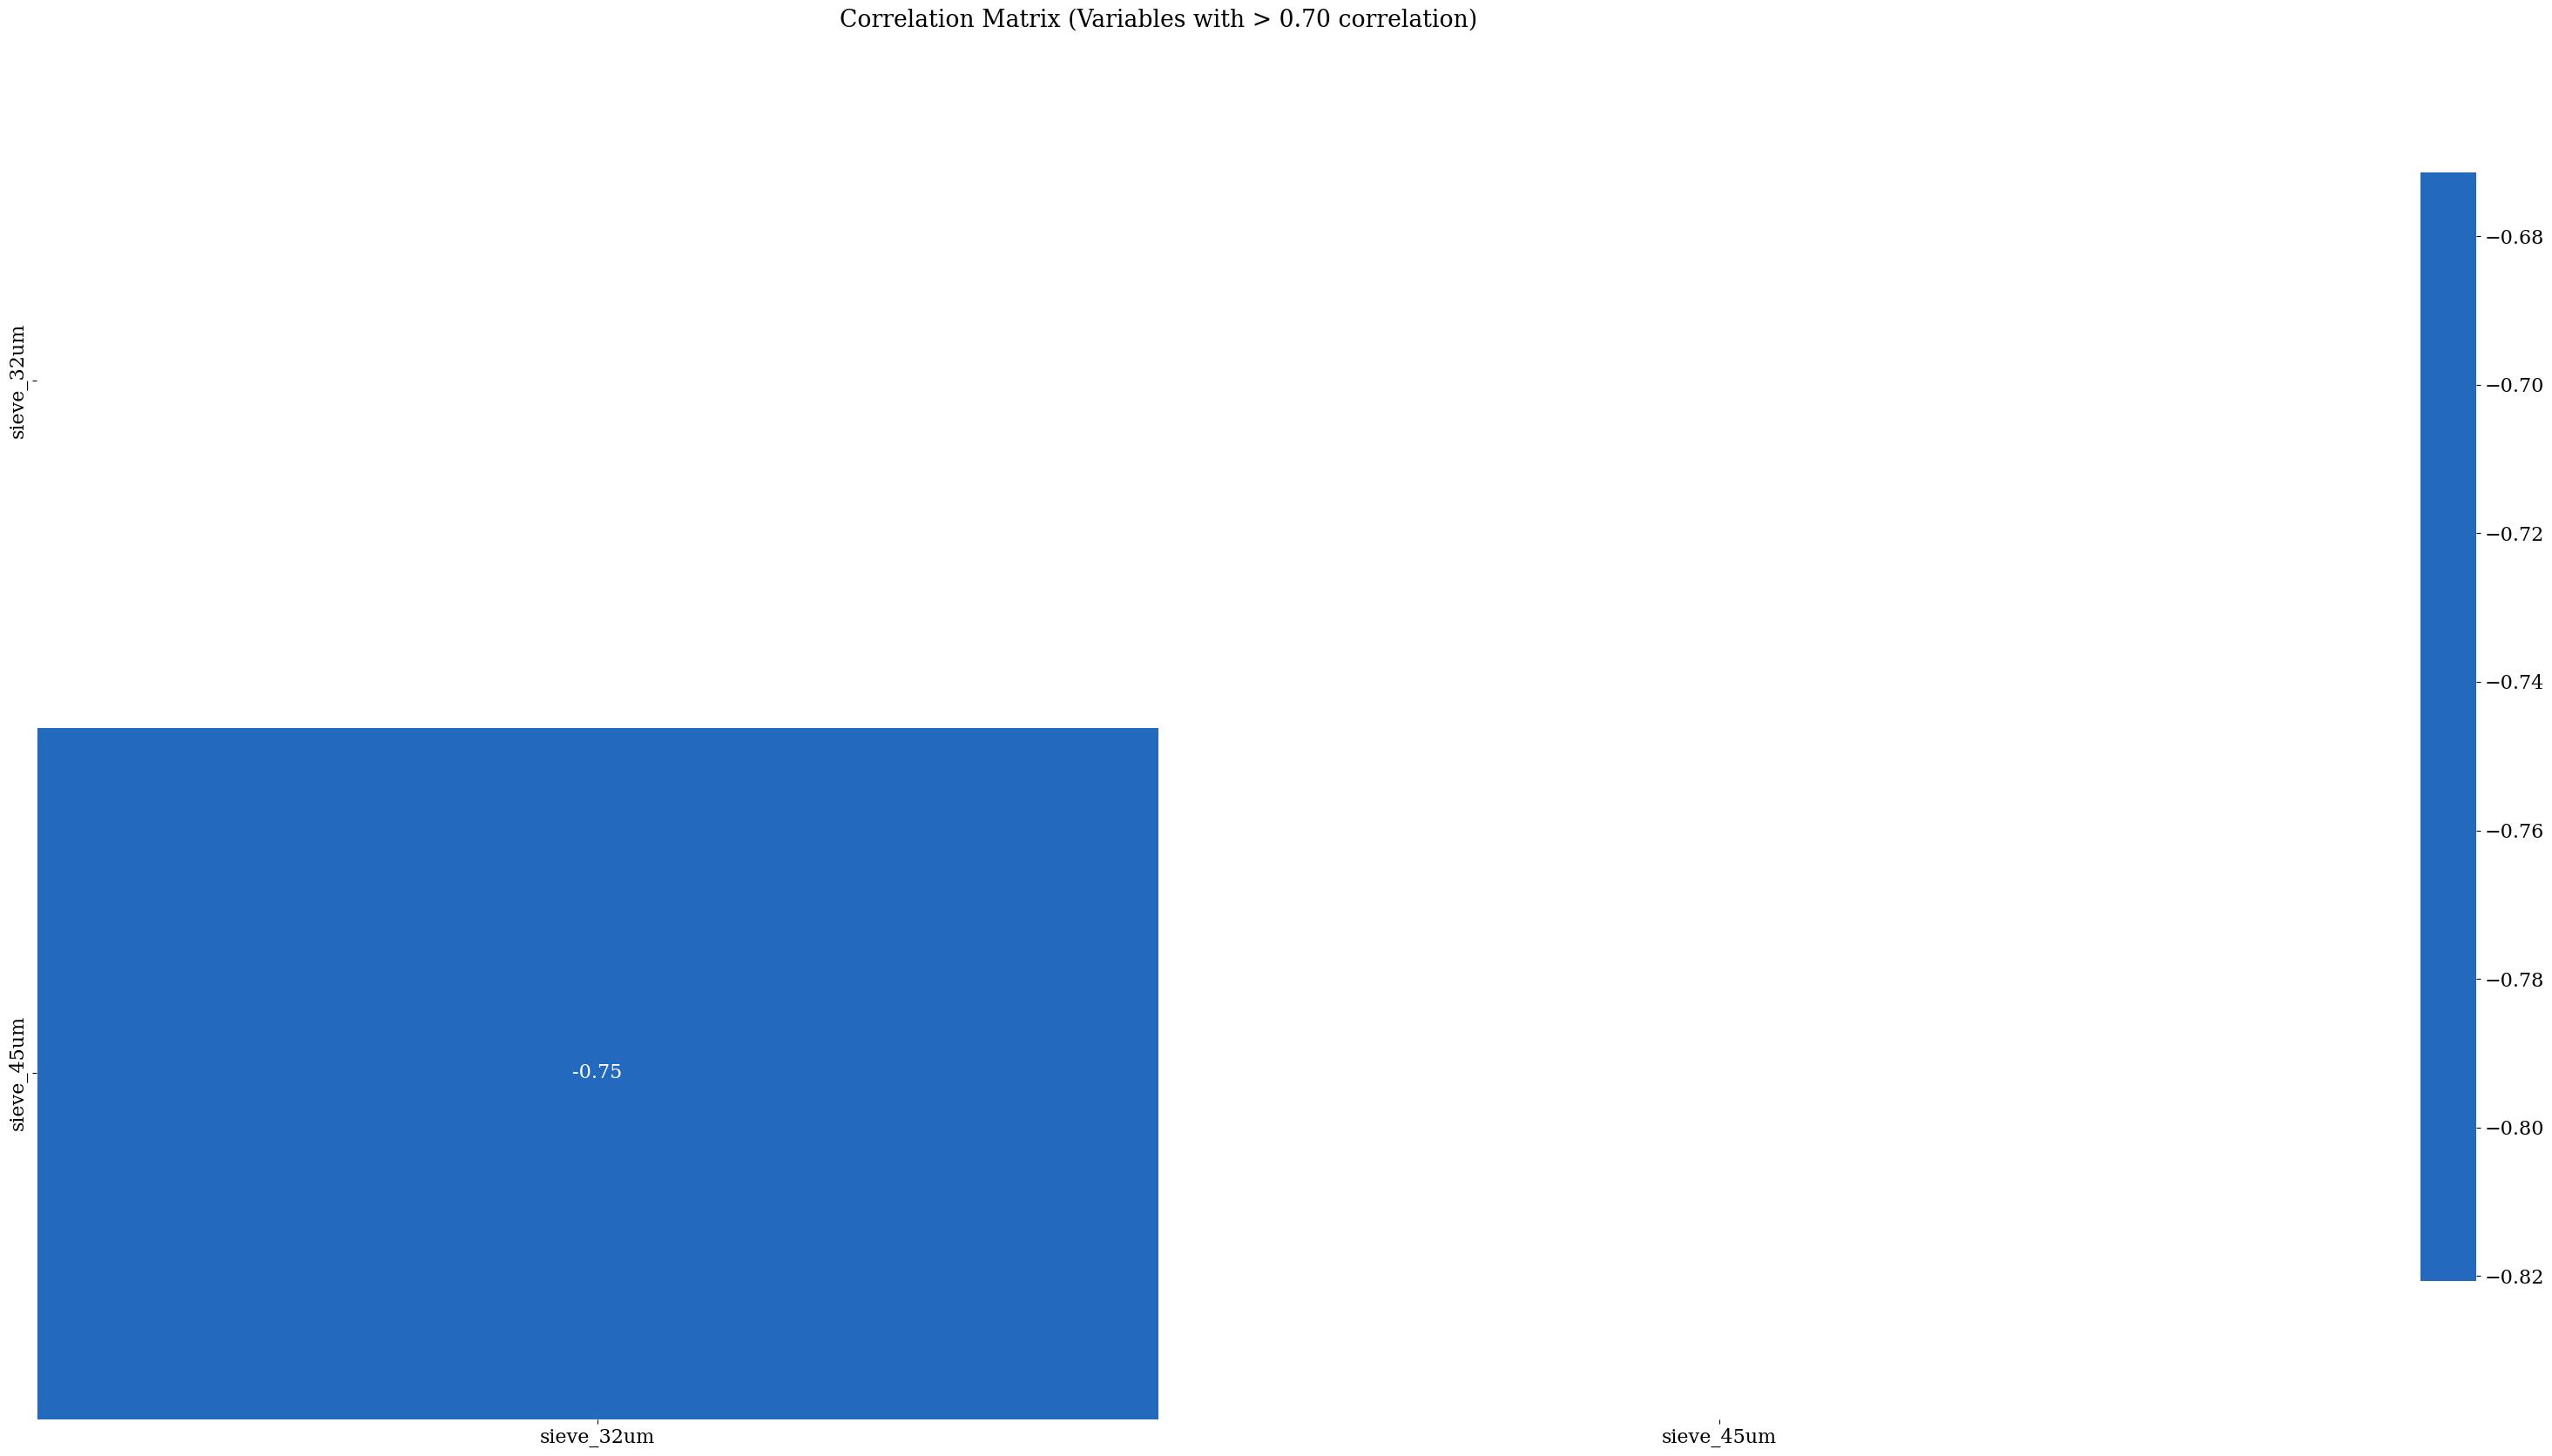

<IPython.core.display.Javascript object>

In [44]:
df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [45]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sieve_32um  sieve_45um    0.746073
dtype: float64

<IPython.core.display.Javascript object>

In [46]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.690390
strength_3d      strength_28d    0.619789
strength_1d      strength_28d    0.581053
loi              strength_28d    0.318182
setting_initial  strength_28d    0.282781
so3              strength_28d    0.254940
alite            strength_28d    0.244718
strength_28d     sieve_32um      0.236656
water_demand     strength_28d    0.223840
strength_28d     sieve_45um      0.208934
                 blaine          0.207191
sample_id_plant  strength_28d    0.183733
ferrite          strength_28d    0.164184
free_lime        strength_28d    0.141044
belite           strength_28d    0.110750
sio2             strength_28d    0.099904
k2o              strength_28d    0.092555
mgo              strength_28d    0.087162
aluminate        strength_28d    0.082689
al2o3            strength_28d    0.059175
fe2o3            strength_28d    0.039429
na2o             strength_28d    0.016278
cao              strength_28d    0.006817
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

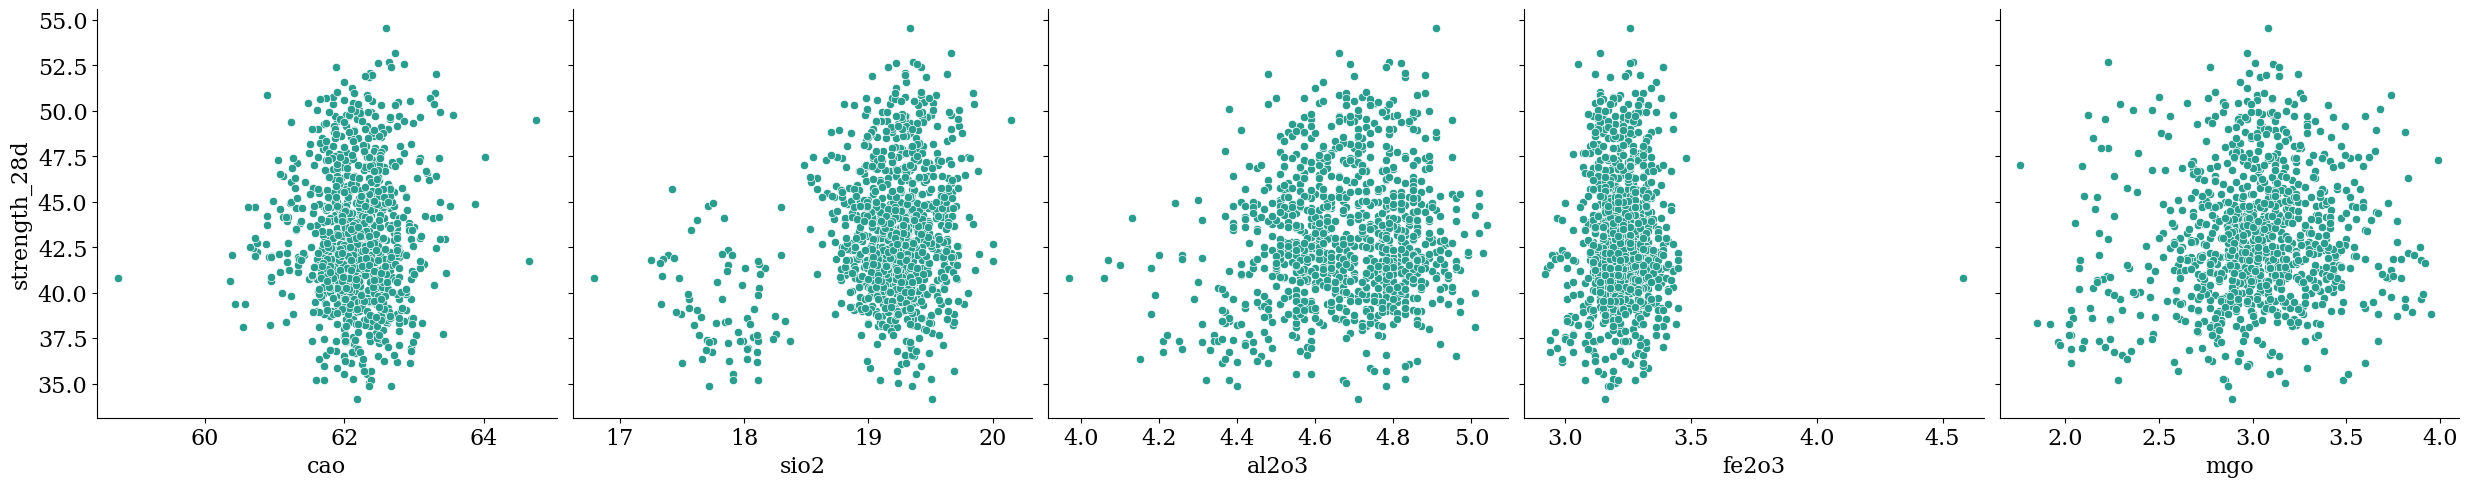

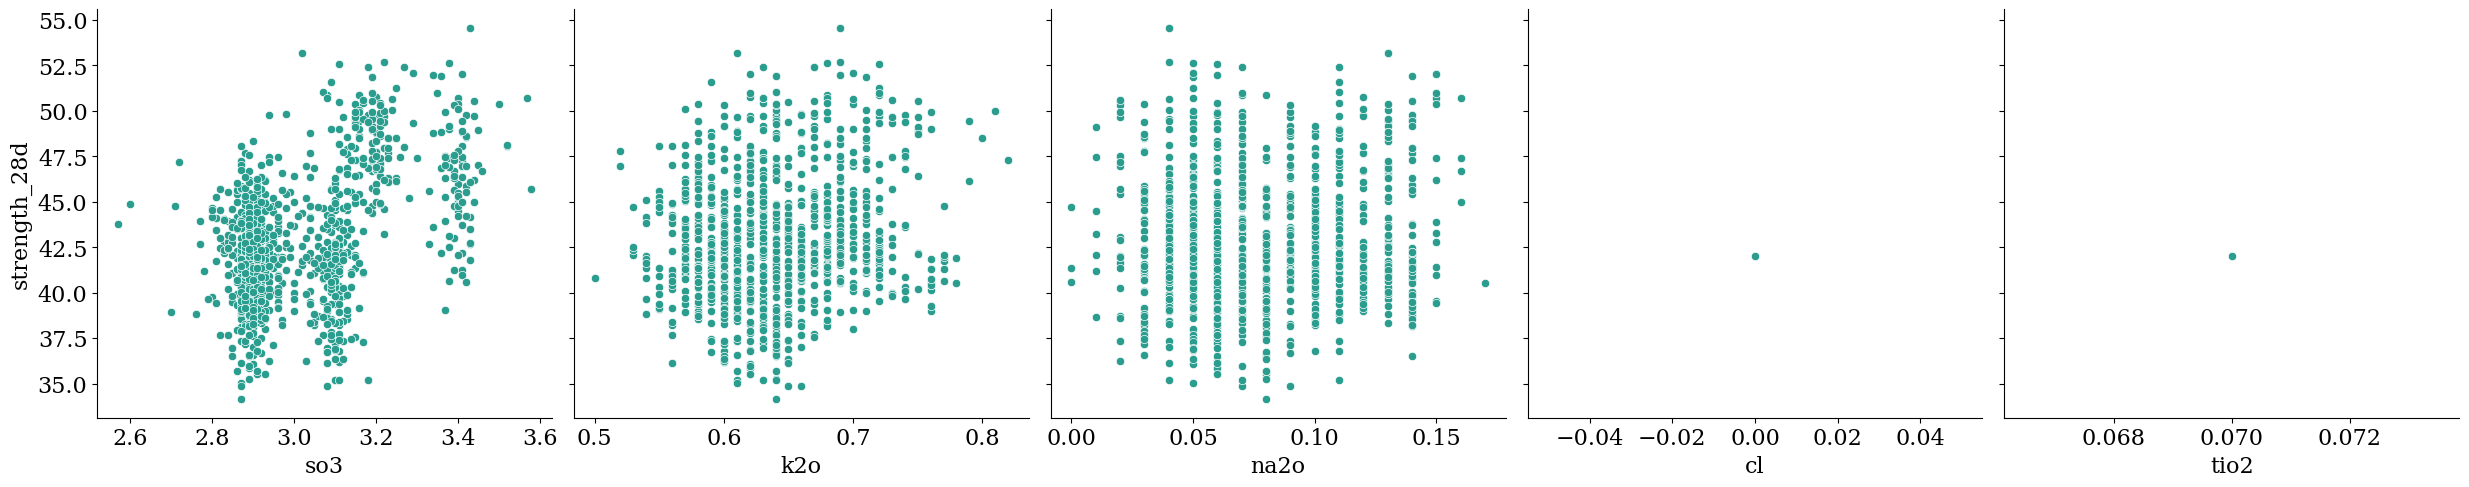

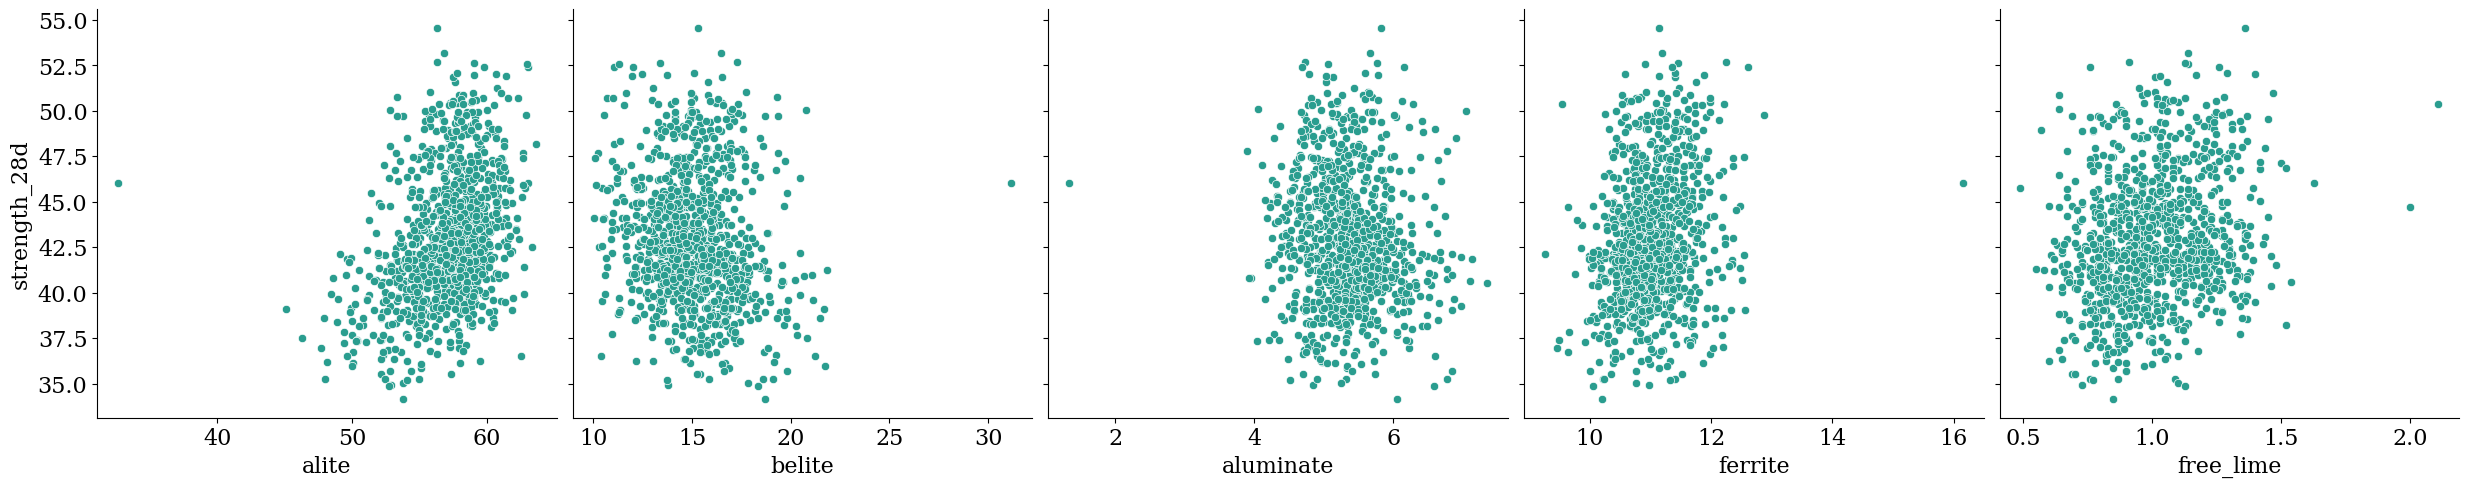

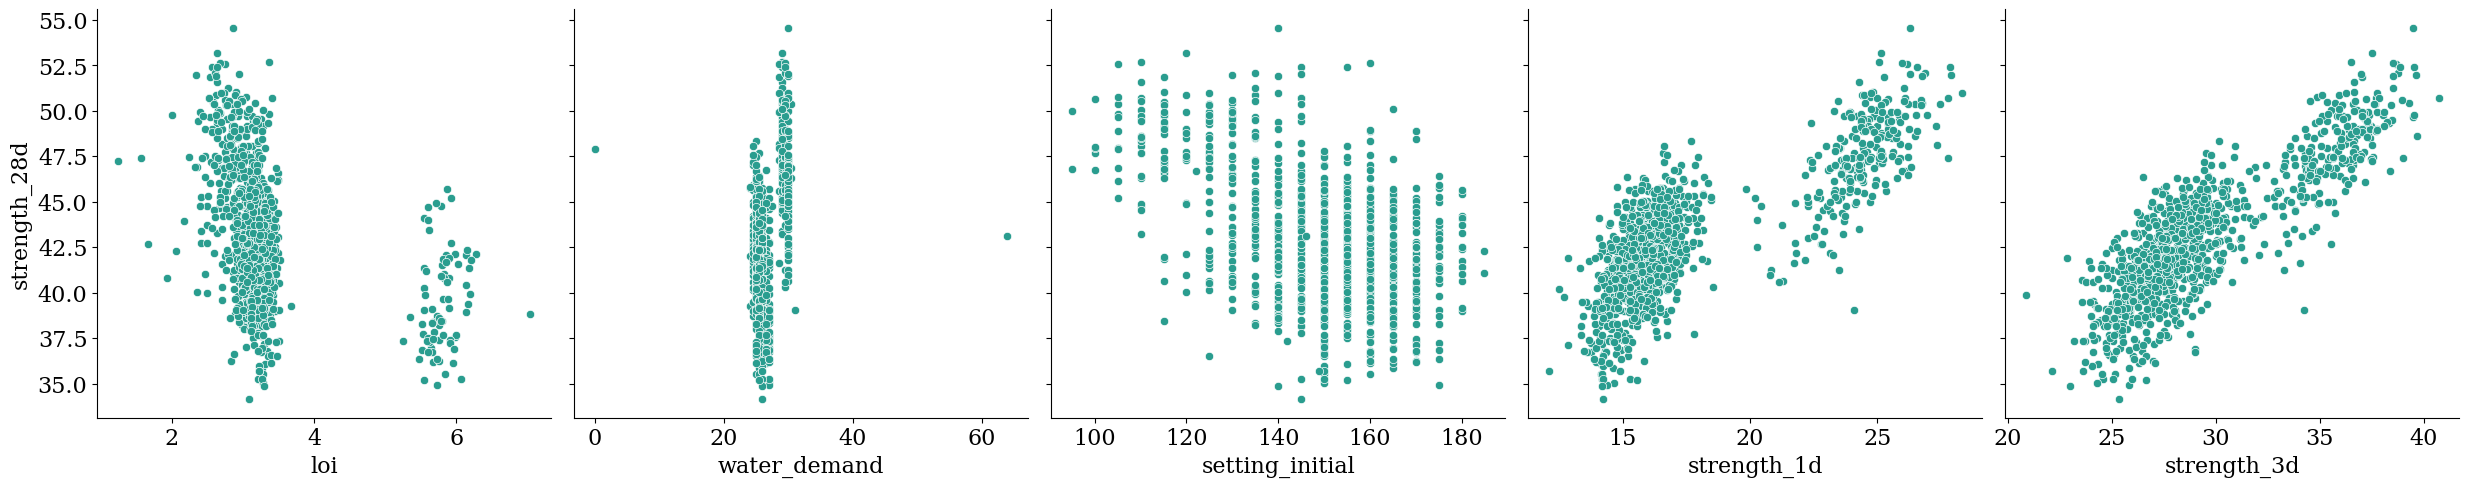

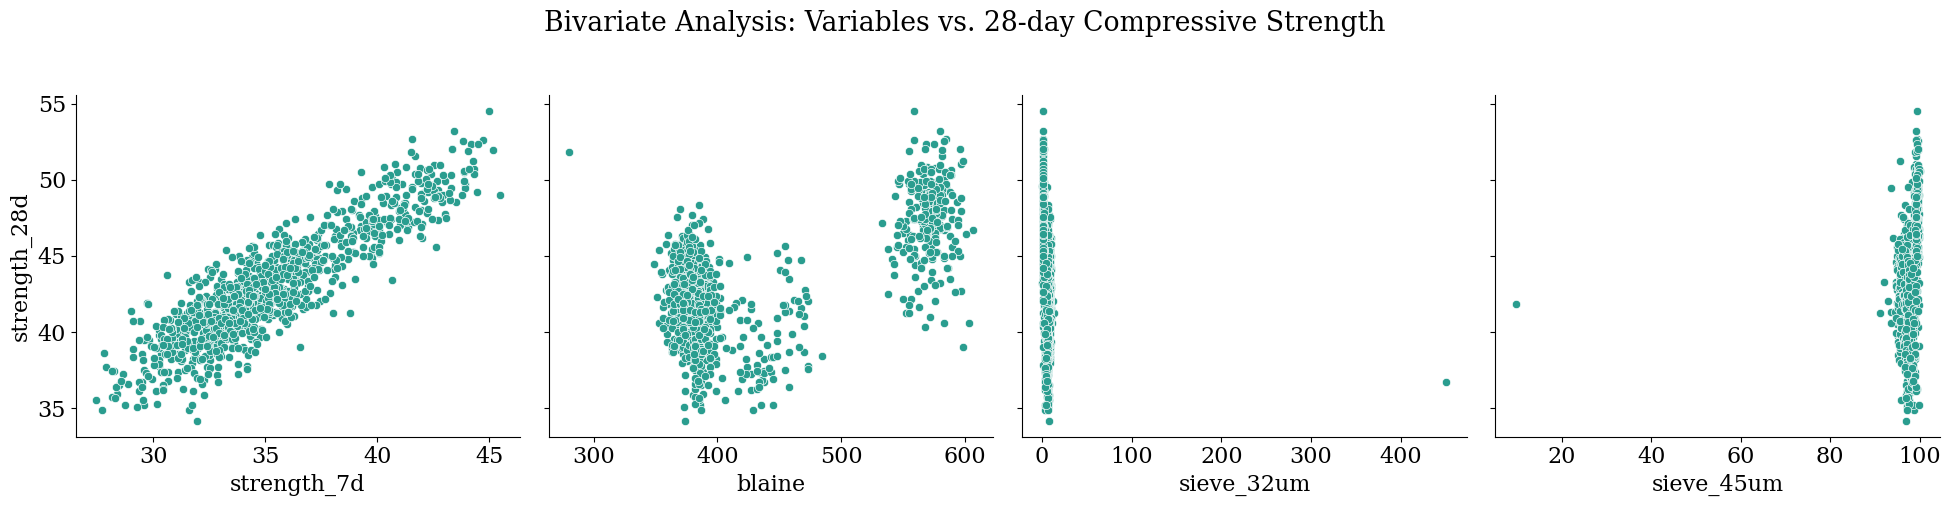

<IPython.core.display.Javascript object>

In [47]:
num_lines = 5
plots_per_line = 5

variables_to_plot = df[df.columns[4:]].select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("strength_28d")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["strength_28d"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()

In [48]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

In [49]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

### 4. Data/Hora Variable Analyses

In [50]:
dates

0      2020-01-01 11:00:00+00:00
1      2020-01-01 11:00:00+00:00
2      2020-01-02 11:00:00+00:00
3      2020-01-02 11:00:00+00:00
4      2020-01-03 11:00:00+00:00
                  ...           
1052   2021-12-28 11:00:00+00:00
1053   2021-12-29 11:00:00+00:00
1054   2021-12-30 11:00:00+00:00
1055   2021-12-31 11:00:00+00:00
1056   2021-12-31 11:00:00+00:00
Name: sample_date, Length: 1057, dtype: datetime64[ns, UTC]

<IPython.core.display.Javascript object>

In [51]:
dates = pd.to_datetime(dates)

<IPython.core.display.Javascript object>

In [52]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

496 valid days out of 693


<IPython.core.display.Javascript object>

In [53]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021}


<IPython.core.display.Javascript object>

In [54]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [55]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        29
      2        29
      3        31
      4        30
      5        31
      6        30
      7        31
      8        31
      9        30
      10       31
      11       30
      12       30
2021  1        29
      2        24
      3        30
      4        30
      5        29
      6        29
      7        18
      8        31
      9        29
      10       24
      11       26
      12       31
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

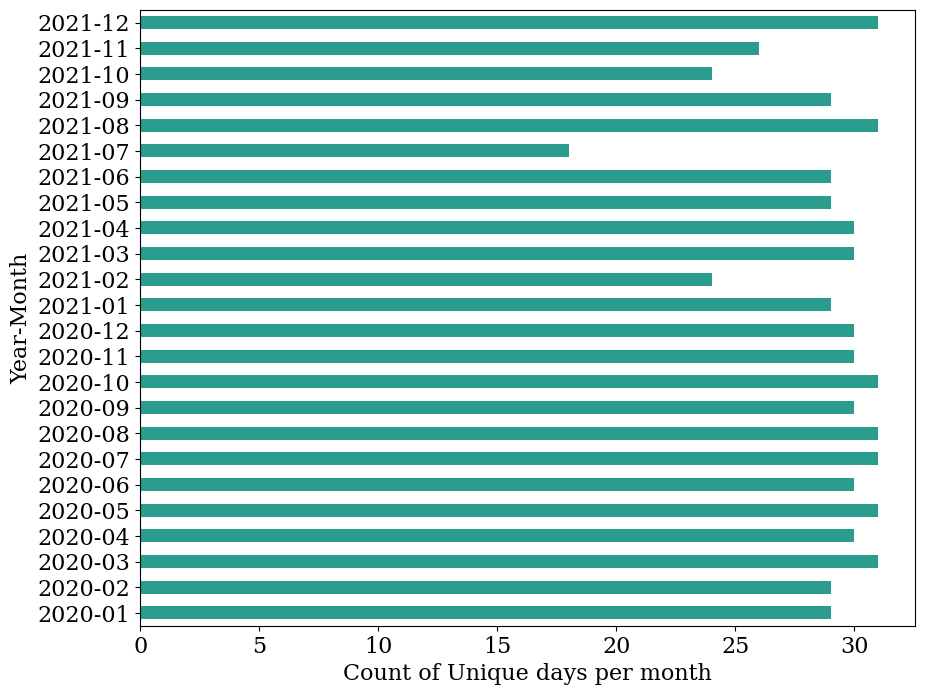

<IPython.core.display.Javascript object>

In [56]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [57]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        41
      2        39
      3        50
      4        44
      5        45
      6        51
      7        49
      8        45
      9        46
      10       49
      11       51
      12       47
2021  1        39
      2        34
      3        50
      4        48
      5        43
      6        43
      7        27
      8        49
      9        44
      10       38
      11       39
      12       46
Name: size, dtype: int64


<IPython.core.display.Javascript object>

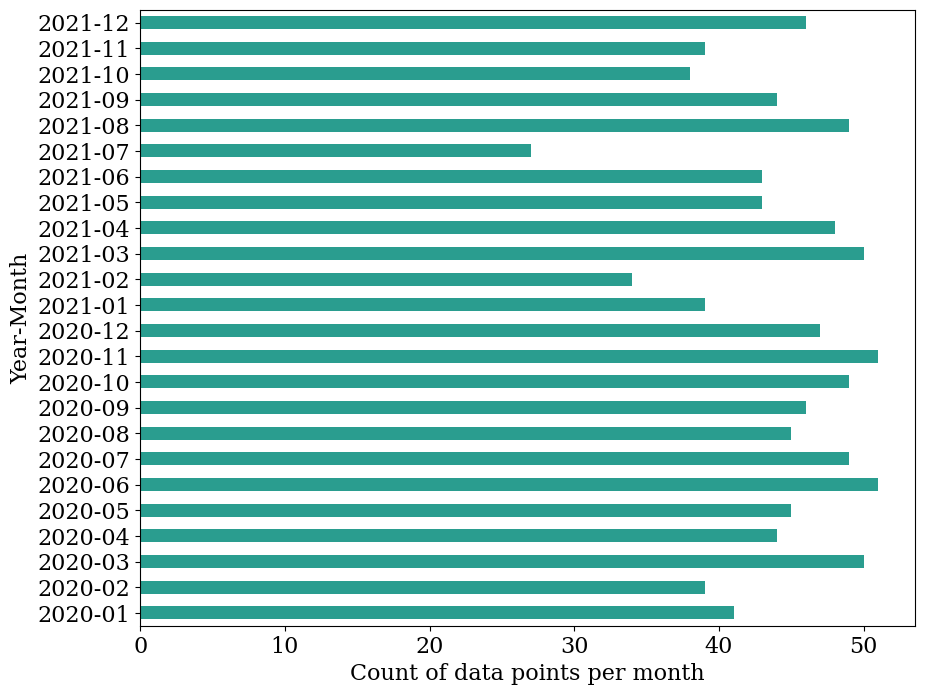

<IPython.core.display.Javascript object>

In [58]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [59]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-7 has the minimum number of days with samples - 27
2020-6 has the maximum number of days with samples - 51


<IPython.core.display.Javascript object>

In [60]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  693.000000
mean     1.525253
std      0.502606
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000

<IPython.core.display.Javascript object>

In [61]:
day_counts[["DayCount"]].value_counts()

DayCount
2           362
1           330
3             1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [62]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
129  2020      5   11         3

<IPython.core.display.Javascript object>

In [63]:
df_copy = df.copy()
df_copy["sample_date"] = pd.to_datetime(df_copy["sample_date"])
df_copy["Year"] = df_copy["sample_date"].dt.year
df_copy["Month"] = df_copy["sample_date"].dt.month
df_copy["Day"] = df_copy["sample_date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["strength_28d"].isna().sum()
    print(daycount, nulls)

1 0
2 0
3 0


<IPython.core.display.Javascript object>

In [64]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [65]:
# Average Frequency
np.mean(diffs)

Timedelta('0 days 16:35:27.272727272')

<IPython.core.display.Javascript object>

In [66]:
Counter(diffs)

Counter({Timedelta('1 days 00:00:00'): 665,
         Timedelta('0 days 00:00:00'): 363,
         Timedelta('2 days 00:00:00'): 18,
         Timedelta('0 days 23:00:00'): 2,
         Timedelta('1 days 01:00:00'): 2,
         Timedelta('3 days 00:00:00'): 2,
         Timedelta('4 days 00:00:00'): 1,
         Timedelta('14 days 00:00:00'): 1,
         Timedelta('0 days 03:30:00'): 1,
         Timedelta('0 days 20:30:00'): 1})

<IPython.core.display.Javascript object>

<Axes: xlabel='count'>

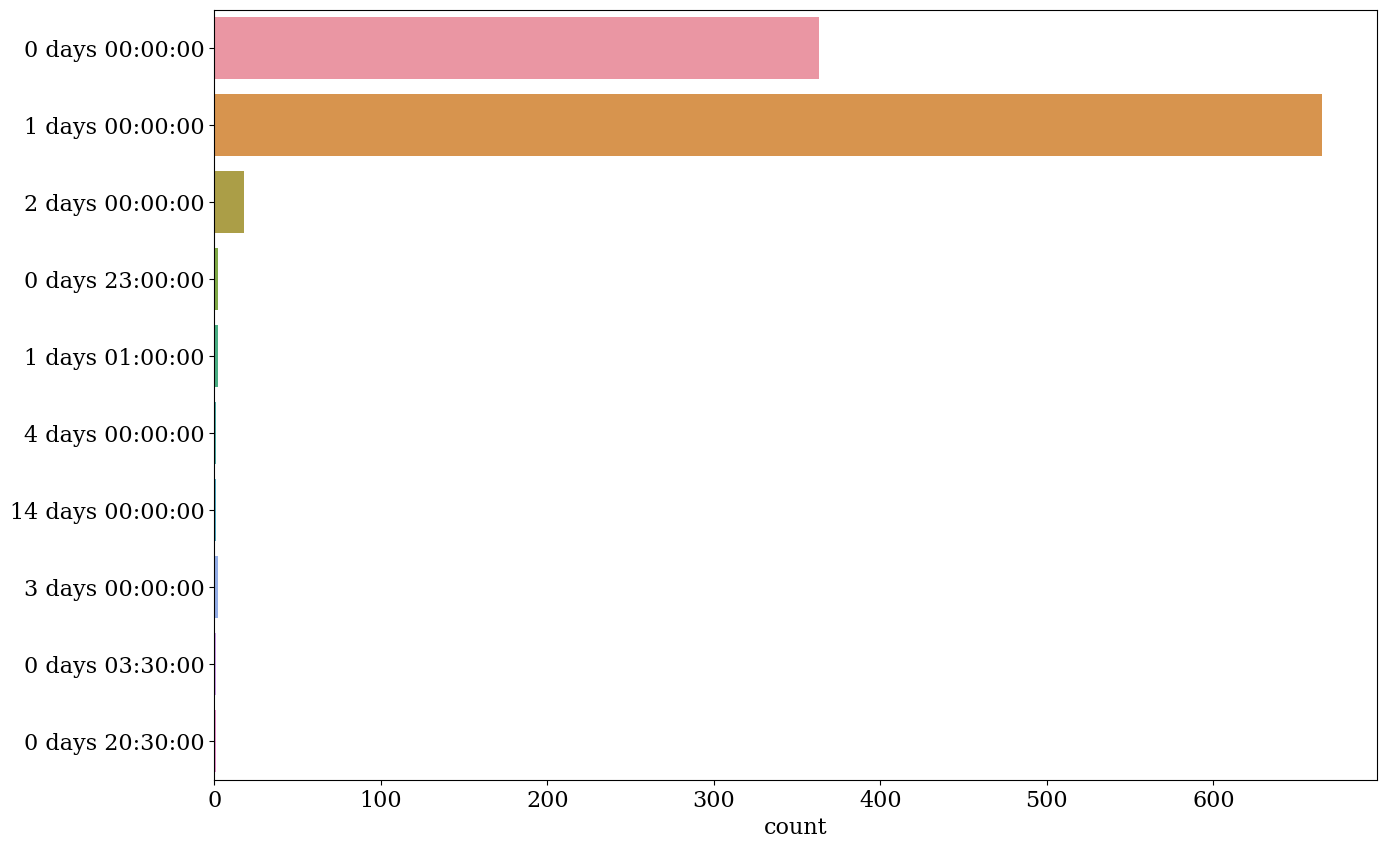

<IPython.core.display.Javascript object>

In [67]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [68]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[34.34, 62.91, 1.7, 0.19, 0.19, 0.09, 0.09, 0.19, 0.09, 0.09]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Days

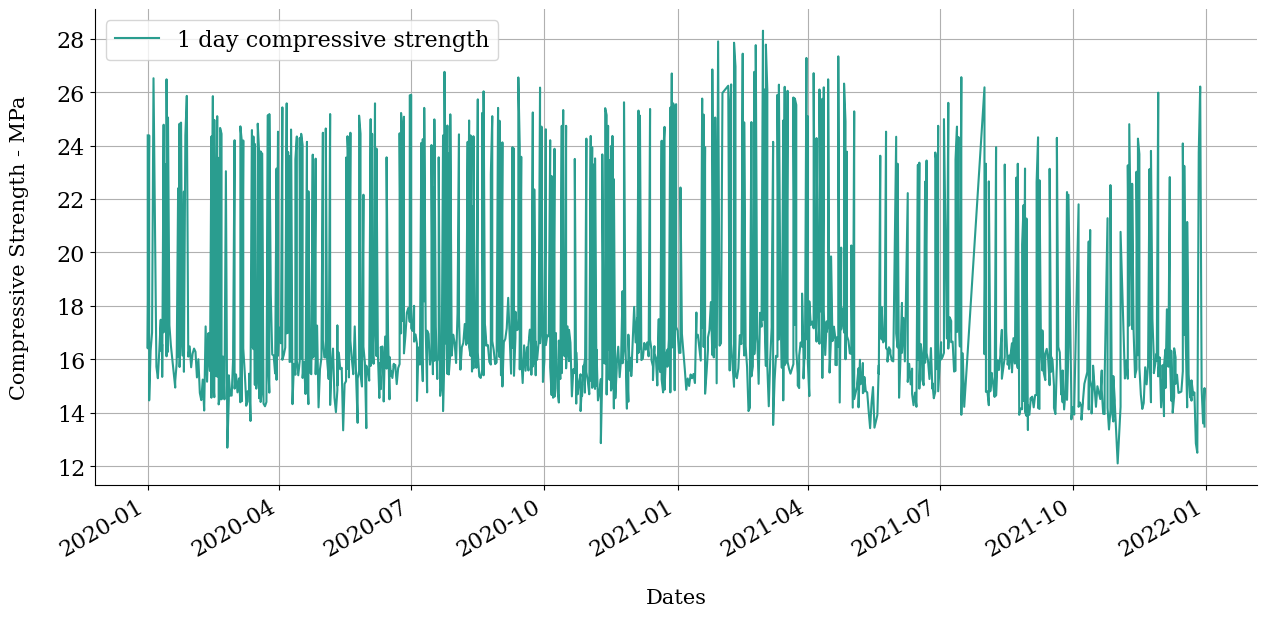

<IPython.core.display.Javascript object>

In [69]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["sample_date"]).dt.date)
tmp = df[["Date", "strength_1d"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 3 Days

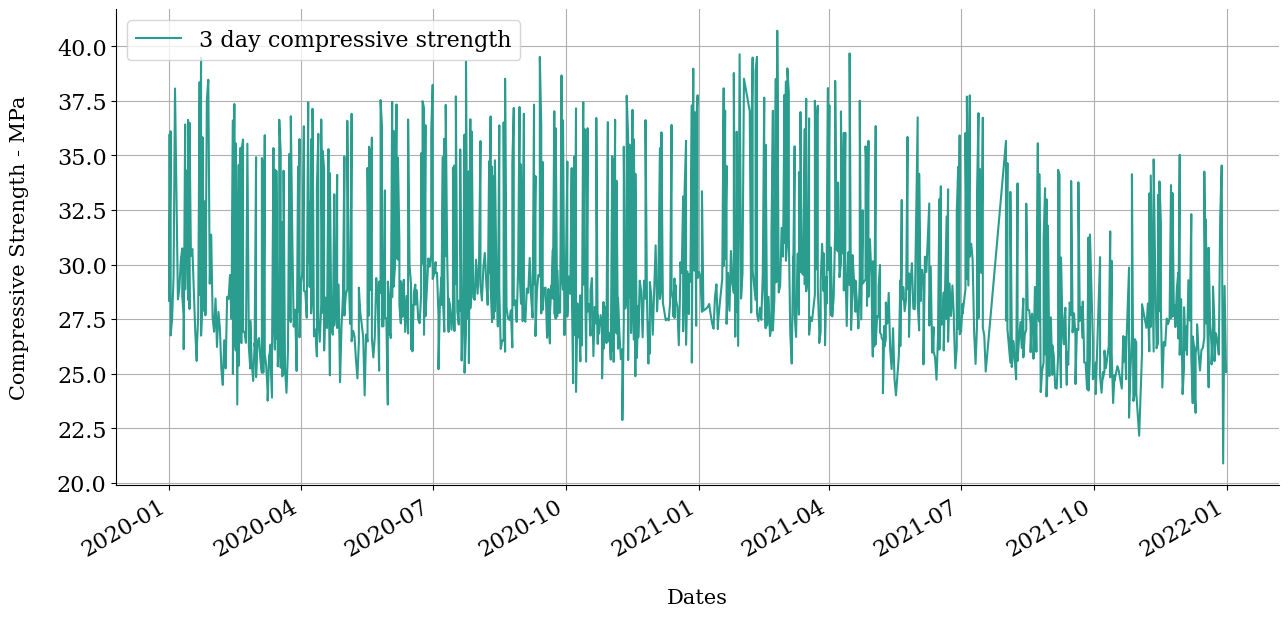

<IPython.core.display.Javascript object>

In [70]:
tmp = df[["Date", "strength_3d"]].dropna().copy()
tmp = tmp.set_index("Date")


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

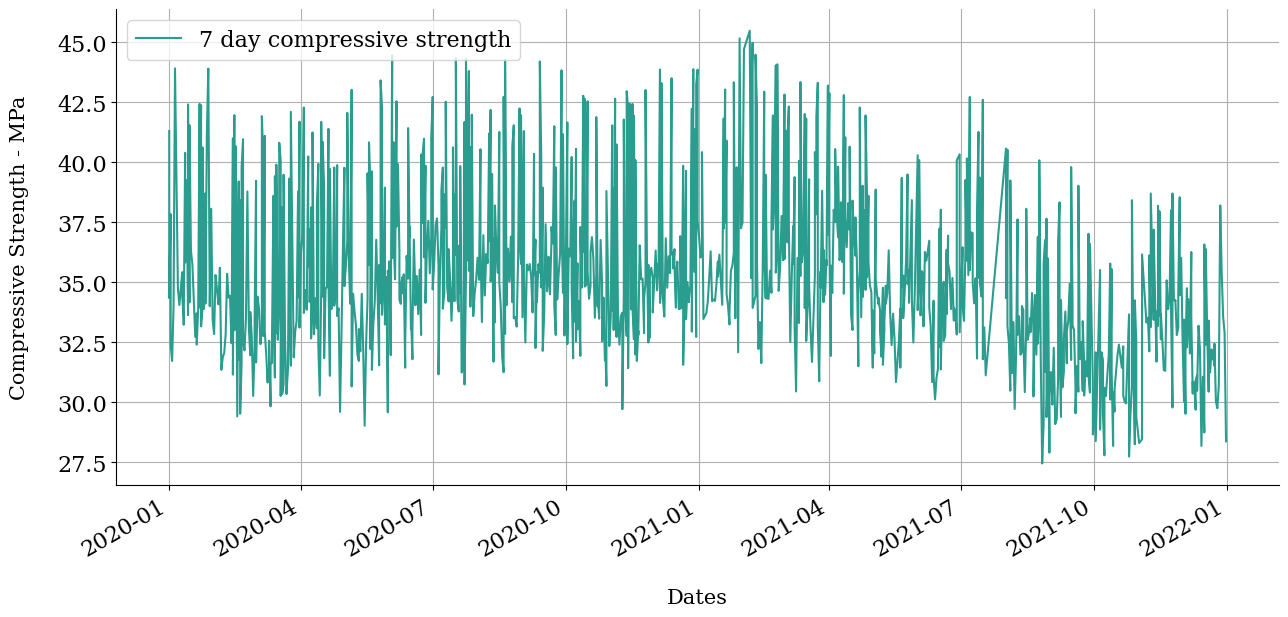

<IPython.core.display.Javascript object>

In [71]:
tmp = df[["Date", "strength_7d"]].dropna().copy()
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

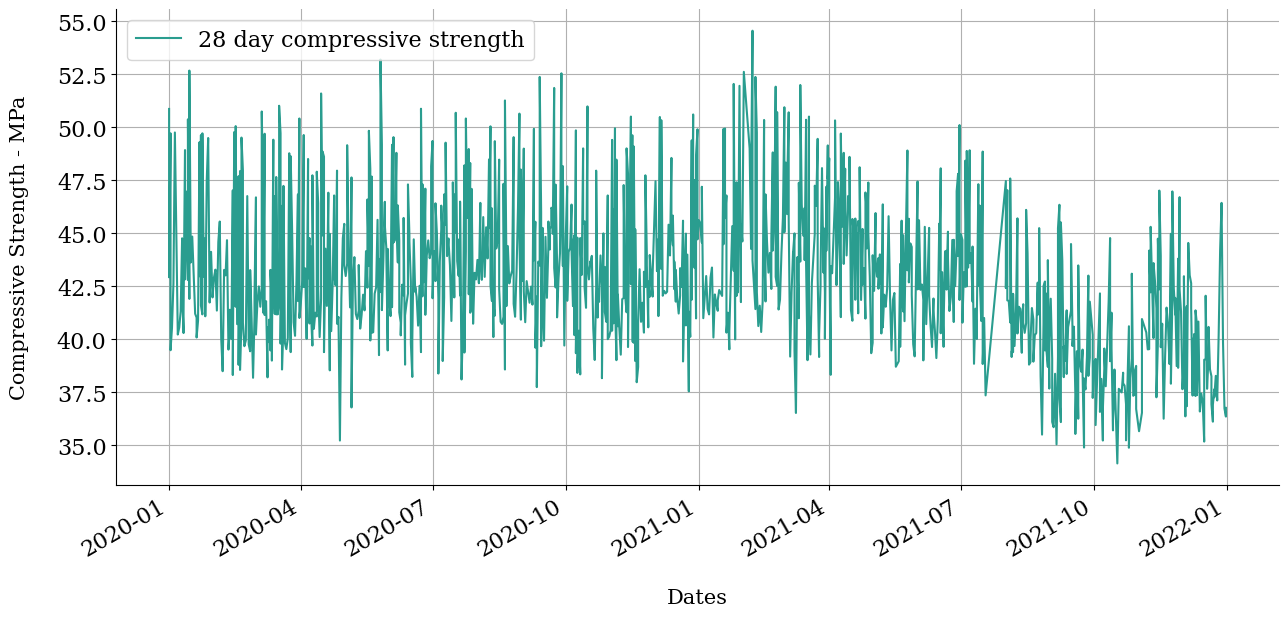

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["Date", "strength_28d"]].dropna().copy()
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()